In [1]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from math import pi
from sklearn.compose import ColumnTransformer
from IPython.display import HTML
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Reading dataset**

In [3]:
df = pd.read_csv("BRFSS.csv")

**Missing values % in the dataset**

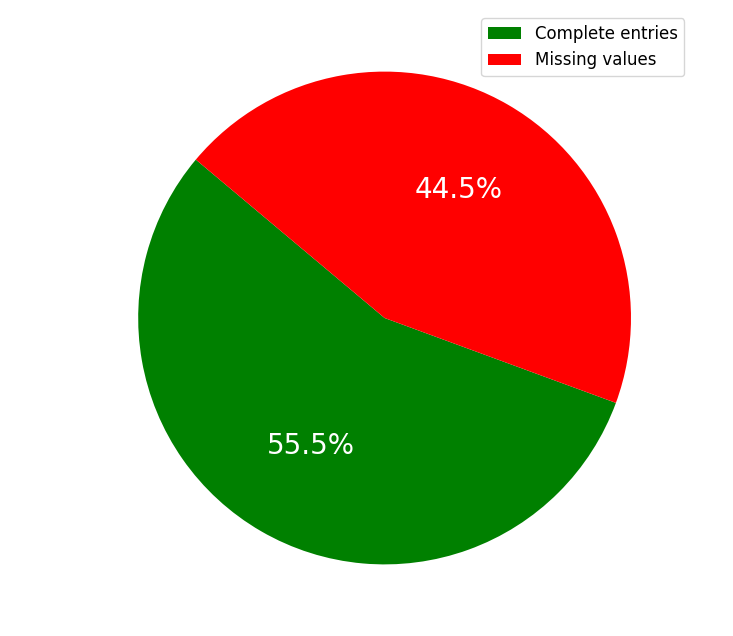

In [4]:
# Count the total number of elements in the DataFrame
total_elements = df.size

# Count the number of NaN elements
nan_count = df.isna().sum().sum()

# Calculate the number of non-NaN elements
non_nan_count = total_elements - nan_count

# Create the data for the pie chart
labels = ['Complete entries', 'Missing values']
sizes = [non_nan_count, nan_count]
colors = ['green', 'red']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20, 'color': 'white'})
plt.legend(labels, loc="best", fontsize=12)
plt.show()

## **INITAL EXPLORATION**

**Number of rows and columns of the dataset**

In [5]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  441456
Columns:  330


**First dataset rows**

In [6]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


**Description of the dataset**

In [7]:
df.describe()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,441456.000000,441456.000000,441456.000000,4.414560e+05,4.414560e+05,254645.0,254645.000000,45.0,254643.0,254646.000000,...,441456.000000,441456.000000,438657.000000,438657.000000,438657.000000,441456.000000,441456.000000,157954.000000,157954.000000,398069.000000
mean,29.968715,6.359676,1115.040457,2.015005e+09,2.015005e+09,1.0,1.000177,1.0,1.0,1.545133,...,3.494124,2.742695,2.716879,2.815149,3.652717,1.824624,1.887028,2.290705,2.412259,1.970156
std,16.034710,3.487131,35.746794,4.113443e+03,4.113443e+03,0.0,0.013292,0.0,0.0,0.497960,...,2.398322,2.449676,1.324145,1.356101,1.266730,2.360812,2.351387,2.518086,2.778032,1.441119
min,1.000000,1.000000,1100.000000,2.015000e+09,2.015000e+09,1.0,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,1100.000000,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,29.000000,6.000000,1100.000000,2.015004e+09,2.015004e+09,1.0,1.000000,1.0,1.0,2.000000,...,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,44.000000,9.000000,1100.000000,2.015007e+09,2.015007e+09,1.0,1.000000,1.0,1.0,2.000000,...,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,72.000000,12.000000,1200.000000,2.015023e+09,2.015023e+09,1.0,2.000000,1.0,1.0,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


**Dataset information**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


**Single report to see from the dataframe: overview, variables information and characteristics, interactions, correlations, missing values, sample and duplicate rows**

In [9]:
# Create the yData profile report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True, minimal=True) # , minimal=True

# To display the report in a Jupyter notebook
# profile.to_widgets()

In [10]:
# profile.to_file("Report_PandasProfiling.html") # export report to html file

----

## **DATA CLEANING & PRE-PROCESSING**

### **Filtering**

**Set the variables of Diabetes and CHD between 0=no and 1=yes**

In [11]:
# DIABETE3 (Variable of Diabetes)
# 0 for no diabetes or only during pregnancy or pre-diabetes or borderline diabetes
# 1 for yes diabetes
# Remove all the 7 (dont knows)
# Remove all the 9 (refused)

df['DIABETE3'] = df['DIABETE3'].replace({2:0, 3:0, 4:0})
df = df[df.DIABETE3 != 7]
df = df[df.DIABETE3 != 9]
df = df.dropna(subset=['DIABETE3'])
df.DIABETE3.unique()

array([0., 1.])

In [12]:
# _MICHD (Variable of CHD)
# Change 2 for 0 because that means did not have MI or CHD
# 0 is for no MI or CHD
# 1 is for yes MI or CHD

df['_MICHD'] = df['_MICHD'].replace({2: 0})
df = df.dropna(subset=['_MICHD'])
df._MICHD.unique()

array([0., 1.])

**Filtering by Diabetes and Age > 45 years old**

In [13]:
# Rows and columns with the dataset filtered by people with Diabetes and Age
df_filtered = df[df["DIABETE3"] == 1]
df_filtered = df_filtered[df_filtered["_AGEG5YR"] > 5]

### **Treatment of variables**

**List of non-numeric variables / columns**

In [14]:
# Non-numeric variables
non_numeric_columns = df_filtered.select_dtypes(exclude=[np.number]).columns.tolist()
non_numeric_columns

['IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'PCDMDECN', 'EXACTOT1', 'EXACTOT2']

**Frequency of each value**

In [15]:
for column in non_numeric_columns:
    print(f"{column} - count of unique values:")
    print(df_filtered[column].value_counts())  # Shows the frequency of each value
    print("\n")

IDATE - count of unique values:
IDATE
b'12032015'    333
b'06022015'    306
b'03042015'    278
b'03032015'    273
b'07072015'    267
              ... 
b'02292016'      1
b'02092016'      1
b'02222016'      1
b'02042016'      1
b'03052016'      1
Name: count, Length: 404, dtype: int64


IMONTH - count of unique values:
IMONTH
b'11'    4899
b'03'    4834
b'02'    4481
b'10'    4411
b'08'    4408
b'12'    4397
b'07'    4386
b'01'    4355
b'06'    4316
b'05'    4258
b'04'    4257
b'09'    3818
Name: count, dtype: int64


IDAY - count of unique values:
IDAY
b'09'    2366
b'03'    2272
b'08'    2213
b'07'    2197
b'02'    2188
b'06'    2166
b'04'    2152
b'10'    2069
b'14'    2030
b'12'    2025
b'11'    1970
b'05'    1928
b'13'    1900
b'15'    1880
b'16'    1847
b'17'    1765
b'18'    1740
b'01'    1716
b'21'    1631
b'20'    1620
b'19'    1566
b'22'    1555
b'23'    1430
b'24'    1318
b'28'    1172
b'27'    1141
b'25'    1130
b'26'    1113
b'30'    1089
b'29'    1069
b'31'     562
Name: 

**Elimination of non-numeric variables (useless in this case)**

In [16]:
# Delete non-numeric columns (they are useless)
data_cleaned = df_filtered.drop(non_numeric_columns, axis=1)

**Elimination of useless variables (extra info on age and heart)**

In [17]:
data_cleaned = data_cleaned.drop(
    ['_STATE', 'FMONTH', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 
     'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN','NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 
     'CCLGHOUS', 'CSTATE', 'LANDLINE', 'HHADULT', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'ASTHNOW', 'DIABETE3', 'DIABAGE2', 
     'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3', 'SEATBELT', 'FLSHTMY2', 'HIVTSTD3','WHRTST10', 'PREDIAB1', 'VIPRFVS2', 
     '_RFHYPE5', '_RFCHOL', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_AGE65YR', '_AGE80', '_AGE_G', 'QSTLANG', '_SMOKER3', 
     '_RFHLTH', 'PNEUVAC3', 'CHILDREN', 'HTM4', 'HTIN4'], axis=1)

In [18]:
data_cleaned.shape

(52820, 270)

### **Missing values**

**Percentage of Nans per column**

In [19]:
# Calculation of the percentage of Nans per column
missing_percentage = data_cleaned.isnull().mean() * 100

# Show columns with Nans sorted in descending order
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_percentage_sorted

PAINACT2    100.000000
QLMENTL2    100.000000
QLSTRES2    100.000000
QLHLTH2     100.000000
VIEYEXM2    100.000000
               ...    
_LMTACT1      0.607724
_LMTWRK1      0.607724
_LMTSCL1      0.607724
_DRDXAR1      0.607724
_STRWT        0.001893
Length: 199, dtype: float64

**Histogram of number columns per percentage of Nans**

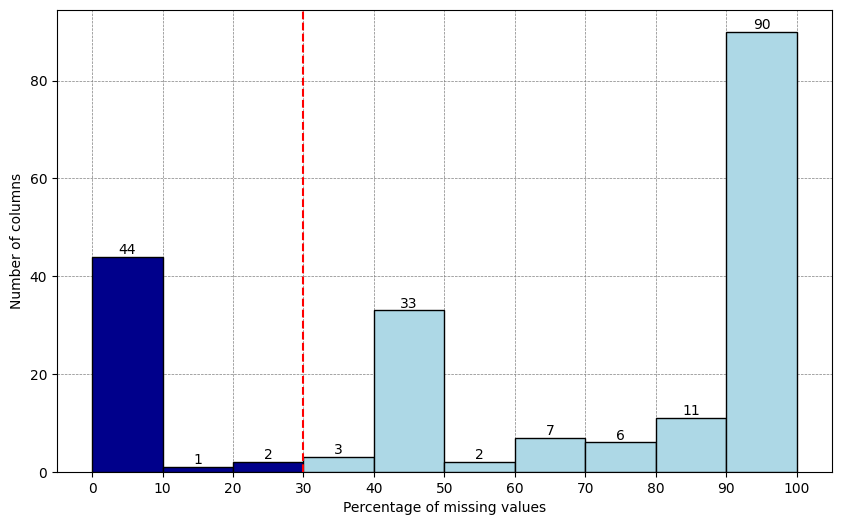

In [20]:
# Define histogram limits
bins = np.arange(0, 101, 10)

# Create histogram
plt.figure(figsize=(10, 6))
# Activate the grid but place it behind the bars.
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, zorder=0)
for i in range(len(bins) - 1):
    b = bins[i]
    if b < 30:
        color = 'darkblue' # Strong blue tint for bars to the left of x=30
    else:
        color = 'lightblue' # Lighter shade of blue for bars to the right of x=30

    if b == 90:
         # Explicitly include 100% in the range of 90 to 100
        count = np.sum((missing_percentage_sorted >= b) & (missing_percentage_sorted <= 100))
    else:
        count = np.sum((missing_percentage_sorted >= b) & (missing_percentage_sorted < b+10))
    
    plt.bar(b + 5, count, width=10, color=color, edgecolor='black', zorder=3)
    # Show the value of each bar
    if count > 0:   # Only display labels for bars with non-zero count
        plt.text(b + 5, count, str(count), ha='center', va='bottom')

plt.axvline(x=30, color='red', linestyle='--', zorder=4)  # Vertical line at x=30
plt.xticks(bins)
plt.xlabel('Percentage of missing values')
plt.ylabel('Number of columns')
plt.show()

**Percentage of NaNs of whole dataframe before elimination**

In [21]:
total_nans = data_cleaned.isna().sum().sum()
total_elementos = data_cleaned.size  
percentage_nans_total = (total_nans / total_elementos) * 100

print("Percentage of total NaNs in the DataFrame:", int(percentage_nans_total), "%")

Percentage of total NaNs in the DataFrame: 46 %


**Elimination of columns with +30% of Nans**

In [22]:
# Remove columns with more than 30% missing values
columns_to_drop = missing_percentage_sorted[missing_percentage_sorted > 30].index
data_cleaned2 = data_cleaned.drop(columns=columns_to_drop)

# New percentage of Nans for remaining columns
new_missing_percentage = data_cleaned2.isnull().mean() * 100
new_missing_percentage_sorted = new_missing_percentage[new_missing_percentage > 0].sort_values(ascending=False)
new_missing_percentage_sorted

_CHISPNC    28.481636
BPMEDS      23.453237
_VEGESUM    11.811814
_FRUTSUM     9.655434
STRFREQ_     9.125331
HIVTST6      9.100719
_AIDTST3     9.100719
VEGEDA1_     9.096933
FLUSHOT6     8.718289
BEANDAY_     8.708822
ORNGDAY_     8.313139
FTJUDA1_     8.220371
GRENDAY_     8.167361
STRENGTH     7.974252
FRUTDA1_     7.925028
_BMI5CAT     7.826581
_BMI5        7.826581
EXERANY2     7.343809
WTKG3        7.071185
VEGETAB1     6.826959
FVORANG      6.620598
FVGREEN      6.442635
FVBEANS      6.240061
FRUIT1       5.993942
FRUITJU1     5.742143
ALCDAY5      3.303673
USENOW3      3.078379
SMOKE100     2.917456
TOLDHI2      2.875805
CHOLCHK      2.875805
DIFFALON     2.750852
DIFFDRES     2.622113
DIFFWALK     2.544491
DECIDE       2.453616
BLIND        2.321090
USEEQUIP     2.184778
QLACTLM2     1.993563
_RACE_G1     1.851571
HEIGHT3      1.215449
WEIGHT2      1.082923
INTERNET     0.895494
INCOME2      0.643696
_DRDXAR1     0.607724
_LMTACT1     0.607724
_LMTWRK1     0.607724
_LMTSCL1  

**Rows and columns after column elimination with +30% Nans**

In [23]:
print("Rows: ", data_cleaned2.shape[0])
print("Columns: ", data_cleaned2.shape[1])

Rows:  52820
Columns:  118


**Percentage of NaNs of whole dataframe after elimination**

In [24]:
total_nans = data_cleaned2.isna().sum().sum()
total_elementos = data_cleaned2.size  
percentage_nans_total = (total_nans / total_elementos) * 100

print("Percentage of total NaNs in the DataFrame:", int(percentage_nans_total), "%")

Percentage of total NaNs in the DataFrame: 2 %


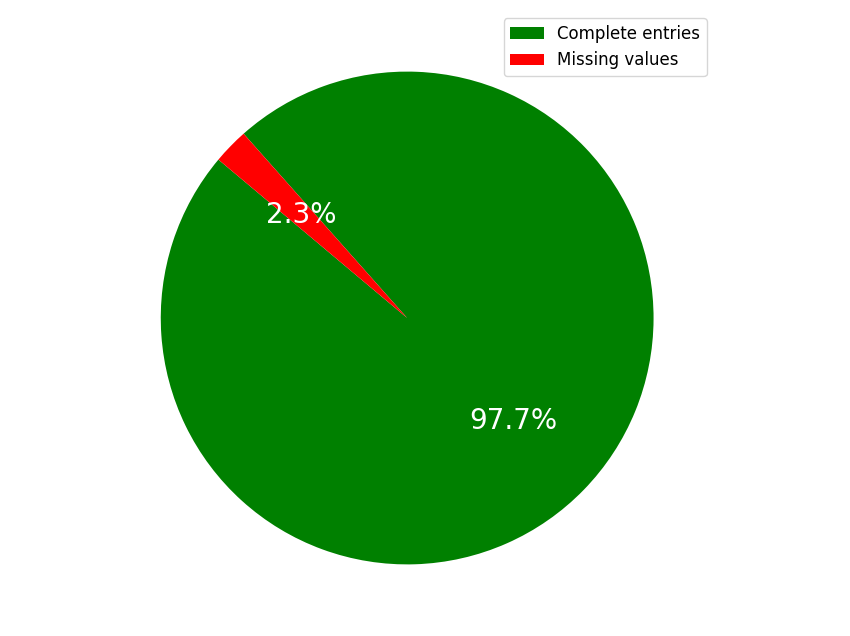

In [25]:
# Count the total number of elements in the DataFrame
total_elements = data_cleaned2.size

# Count the number of NaN elements
nan_count = data_cleaned2.isna().sum().sum()

# Calculate the number of non-NaN elements
non_nan_count = total_elements - nan_count

# Create the data for the pie chart
labels = ['Complete entries', 'Missing values']
sizes = [non_nan_count, nan_count]
colors = ['green', 'red']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20, 'color': 'white'})
plt.legend(labels, loc="best", fontsize=12)
plt.show()

### **Variable types**

In [26]:
HTML(pd.DataFrame(data_cleaned2.dtypes, columns=['Type']).to_html())

,Type
GENHLTH,float64
PHYSHLTH,float64
MENTHLTH,float64
HLTHPLN1,float64
PERSDOC2,float64
MEDCOST,float64
CHECKUP1,float64
BPHIGH4,float64
BPMEDS,float64
CHOLCHK,float64


**Number of unique values per column**

In [27]:
unique_values = data_cleaned2.nunique()
HTML(pd.DataFrame(unique_values, columns=['Unique values']).to_html())

,Unique values
GENHLTH,7
PHYSHLTH,33
MENTHLTH,33
HLTHPLN1,4
PERSDOC2,5
MEDCOST,4
CHECKUP1,7
BPHIGH4,6
BPMEDS,4
CHOLCHK,6


**Histogram of number of unique values per column**

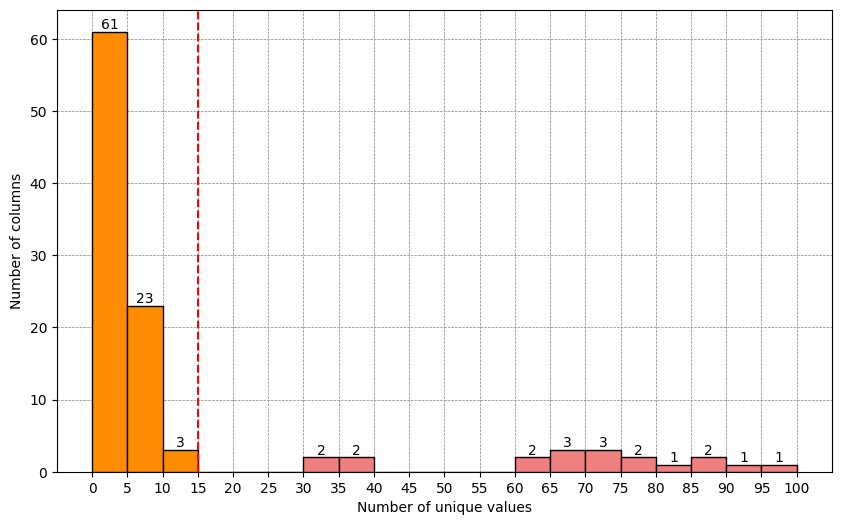

In [28]:
# Define histogram limits
bins = np.arange(0, 105, 5)

# Create histogram
plt.figure(figsize=(10, 6))
# Activate the grid but place it behind the bars.
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, zorder=0)
for b in bins[:-1]:
    if b < 15:
        color = 'darkorange'  # Darker shade of orange for bars to the left of x=15
    else:
        color = 'lightcoral'  # Lighter shade of orange for bars to the right of x=15
    # Calculate the number of columns in this range of bin
    count = np.sum((unique_values >= b) & (unique_values < b+5))
    plt.bar(b + 2.5, count, width=5, color=color, edgecolor='black', zorder=3)
    # Show the value of each bar
    if count > 0:   # Only display labels for bars with non-zero count
        plt.text(b + 2.5, count, str(count), ha='center', va='bottom')

plt.axvline(x=15, color='red', linestyle='--', zorder=4)   # Vertical line at x=15
plt.xticks(bins)
plt.xlabel('Number of unique values')
plt.ylabel('Number of columns')
plt.show()

**Change categrical values that were encoded as floats into categorical values**

In [29]:
# Function to check it its real intenger (number.0 and not number.x)
def is_integer(x):
    try:
        return float(x).is_integer()
    except ValueError:
        return False

# Finds columns that are of type 'float64' or 'int64' and have 15 unique values or less
categories = [col for col in data_cleaned2.columns if (data_cleaned2[col].dtype == 'float64' or data_cleaned2[col].dtype == 'int64') and data_cleaned2[col].nunique() <= 15]

# Convert these columns to type 'category' only if all values are integers
for col in categories:
    # Checks if all values in the column are actually integers (.0 as fractional part)
    if all(data_cleaned2[col].dropna().apply(is_integer)):
        data_cleaned2[col] = data_cleaned2[col].astype('category')

**Variable types before categorical change**

In [30]:
HTML(pd.DataFrame(data_cleaned2.dtypes, columns=['Type']).to_html())

,Type
GENHLTH,category
PHYSHLTH,float64
MENTHLTH,float64
HLTHPLN1,category
PERSDOC2,category
MEDCOST,category
CHECKUP1,category
BPHIGH4,category
BPMEDS,category
CHOLCHK,category


In [31]:
data_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52820 entries, 11 to 441455
Columns: 118 entries, GENHLTH to _AIDTST3
dtypes: category(77), float64(41)
memory usage: 20.8 MB


**We put Median in Nans of numeric columns and Mode in Nans of categorical columns.**

In [32]:
# Iterate over each column in the DataFrame
for column in data_cleaned2.columns:
    
    if data_cleaned2[column].dtype == 'category':
        # Calculate the mode for each categorical column and fill in NaNs
        mode = data_cleaned2[column].mode()[0] # We use [0] to select the most frequent mode in case of ties.
        # Impute the fashion in the missing values
        data_cleaned2[column] = data_cleaned2[column].fillna(mode)
    
    elif data_cleaned2[column].dtype == 'float64':
        # Calculate the median for each numerical column and fill in NaNs
        median = data_cleaned2[column].median()
        # Impute the median in missing values
        data_cleaned2[column] = data_cleaned2[column].fillna(median)

**Nans Verification**

In [33]:
# Check for existence of Nans after adding medians and modes
missing_values_after_imputation = data_cleaned2.isnull().sum()  # Total Nans per columna
total_missing_values = missing_values_after_imputation.sum()  # Total Nans in all dataframe
print("Shape: ", data_cleaned2.shape)

# Print the total Nans and the Nans per column if they exist
print("Total de Nans en todo el DataFrame:", total_missing_values)

Shape:  (52820, 118)
Total de Nans en todo el DataFrame: 0


-----------

## **INITIAL EXPLORATORY DATA ANALYSIS**

**Correlation map**

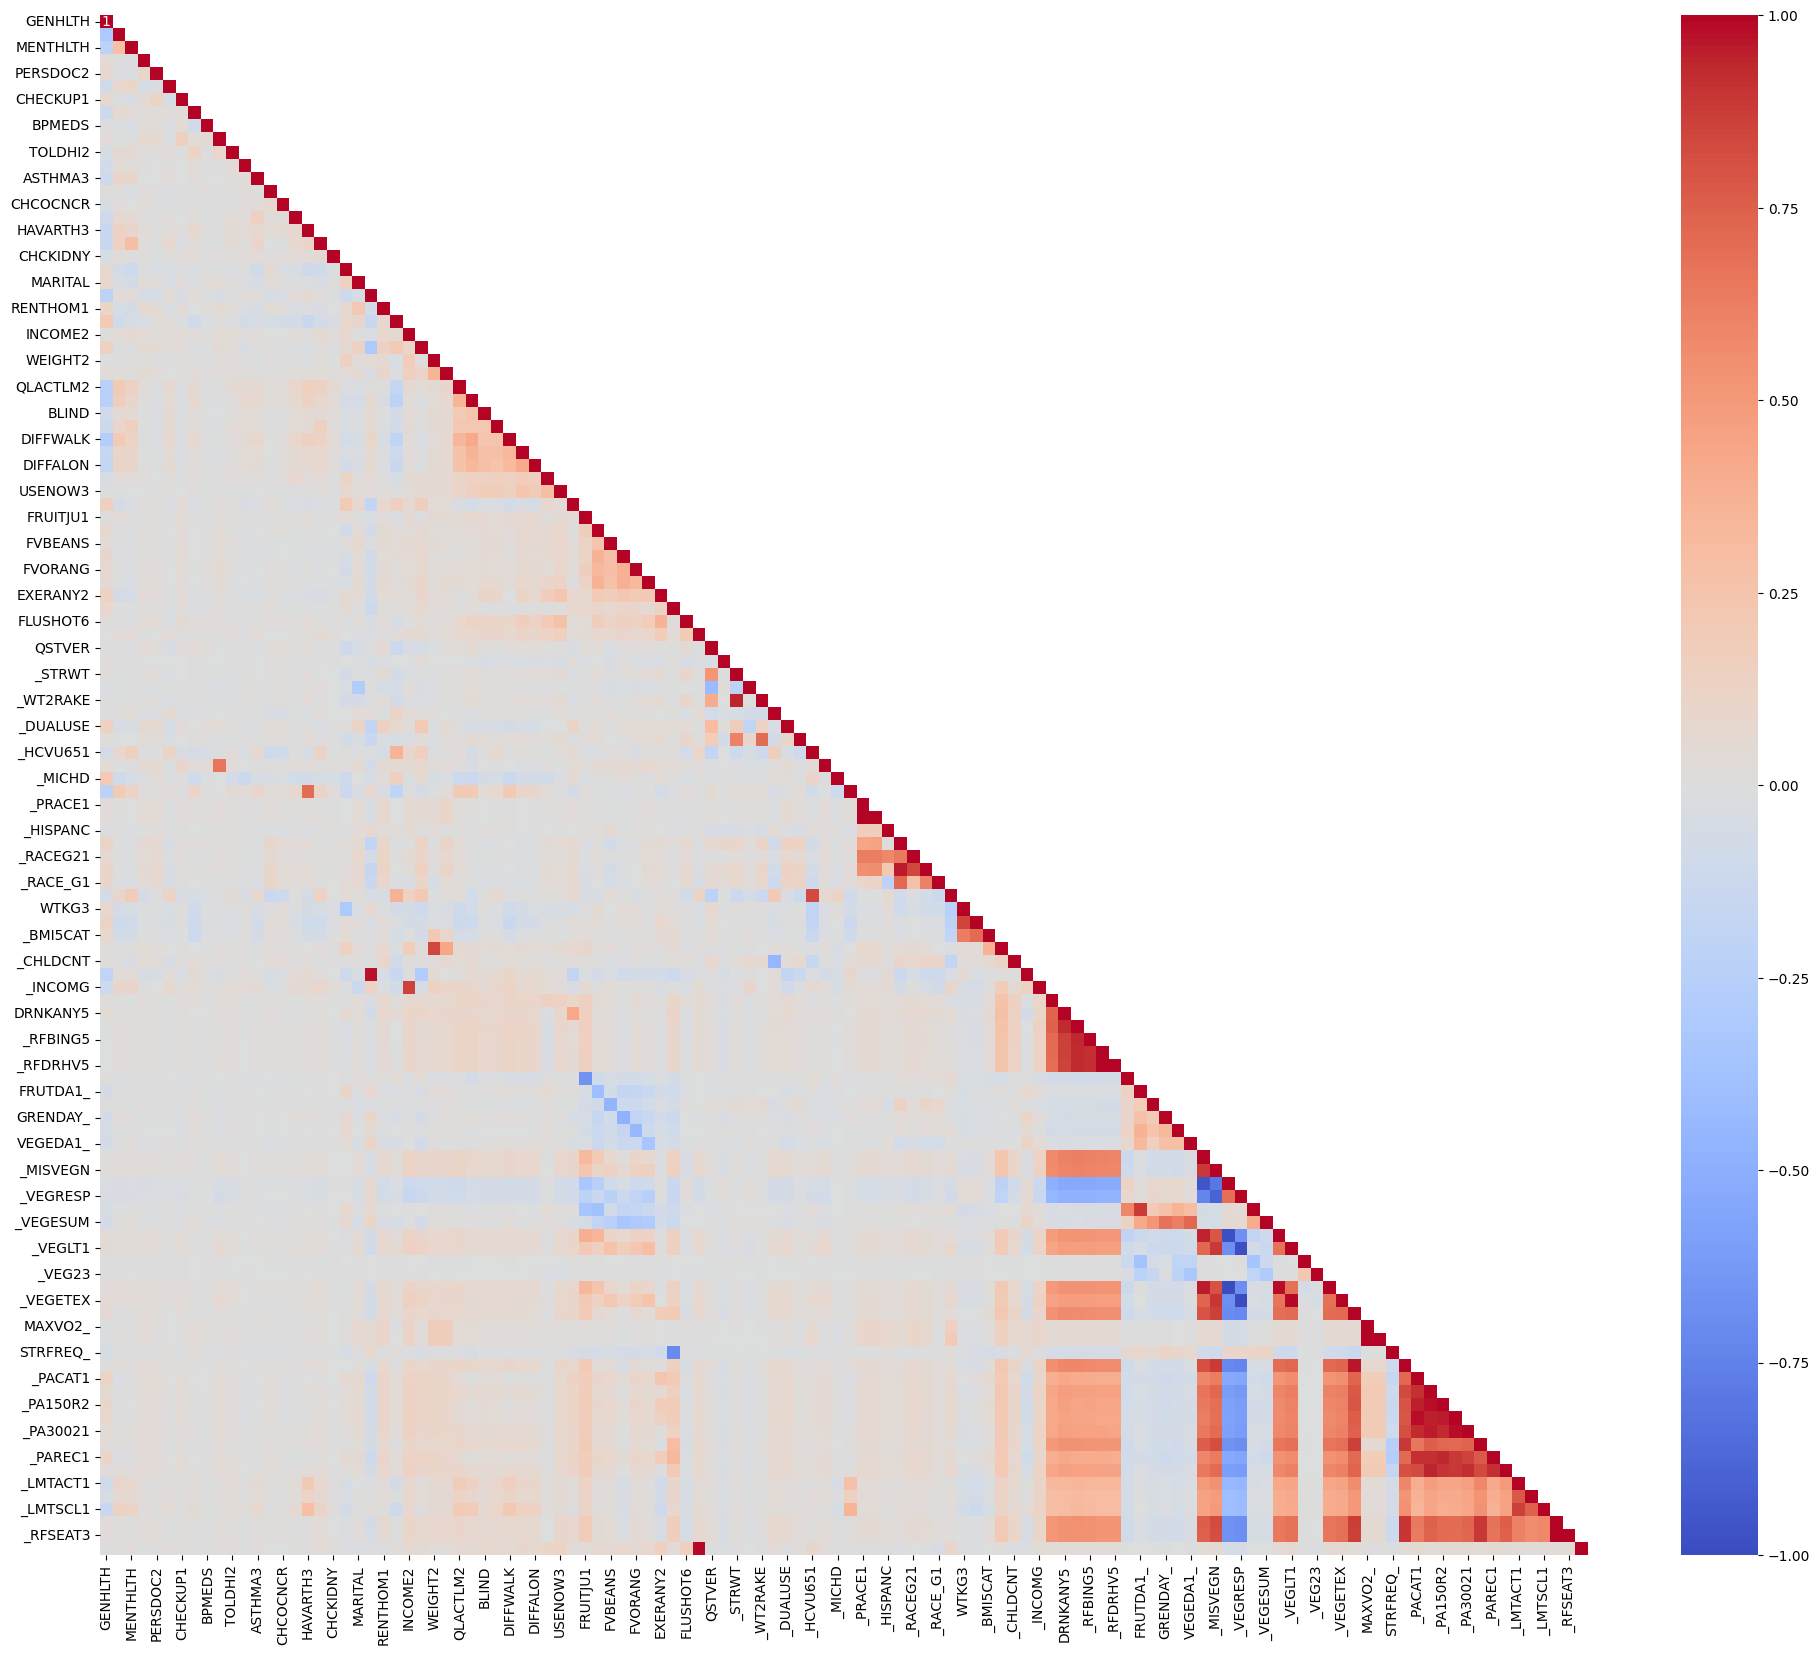

In [34]:
# Calculate the correlation matrix of the dataframe (correlation coefficients between variables)
matriz_correlacion = data_cleaned2.corr()

# Create a mask to hide the upper triangular part excluding the diagonal
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool), k=1)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(24, 20))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.show()

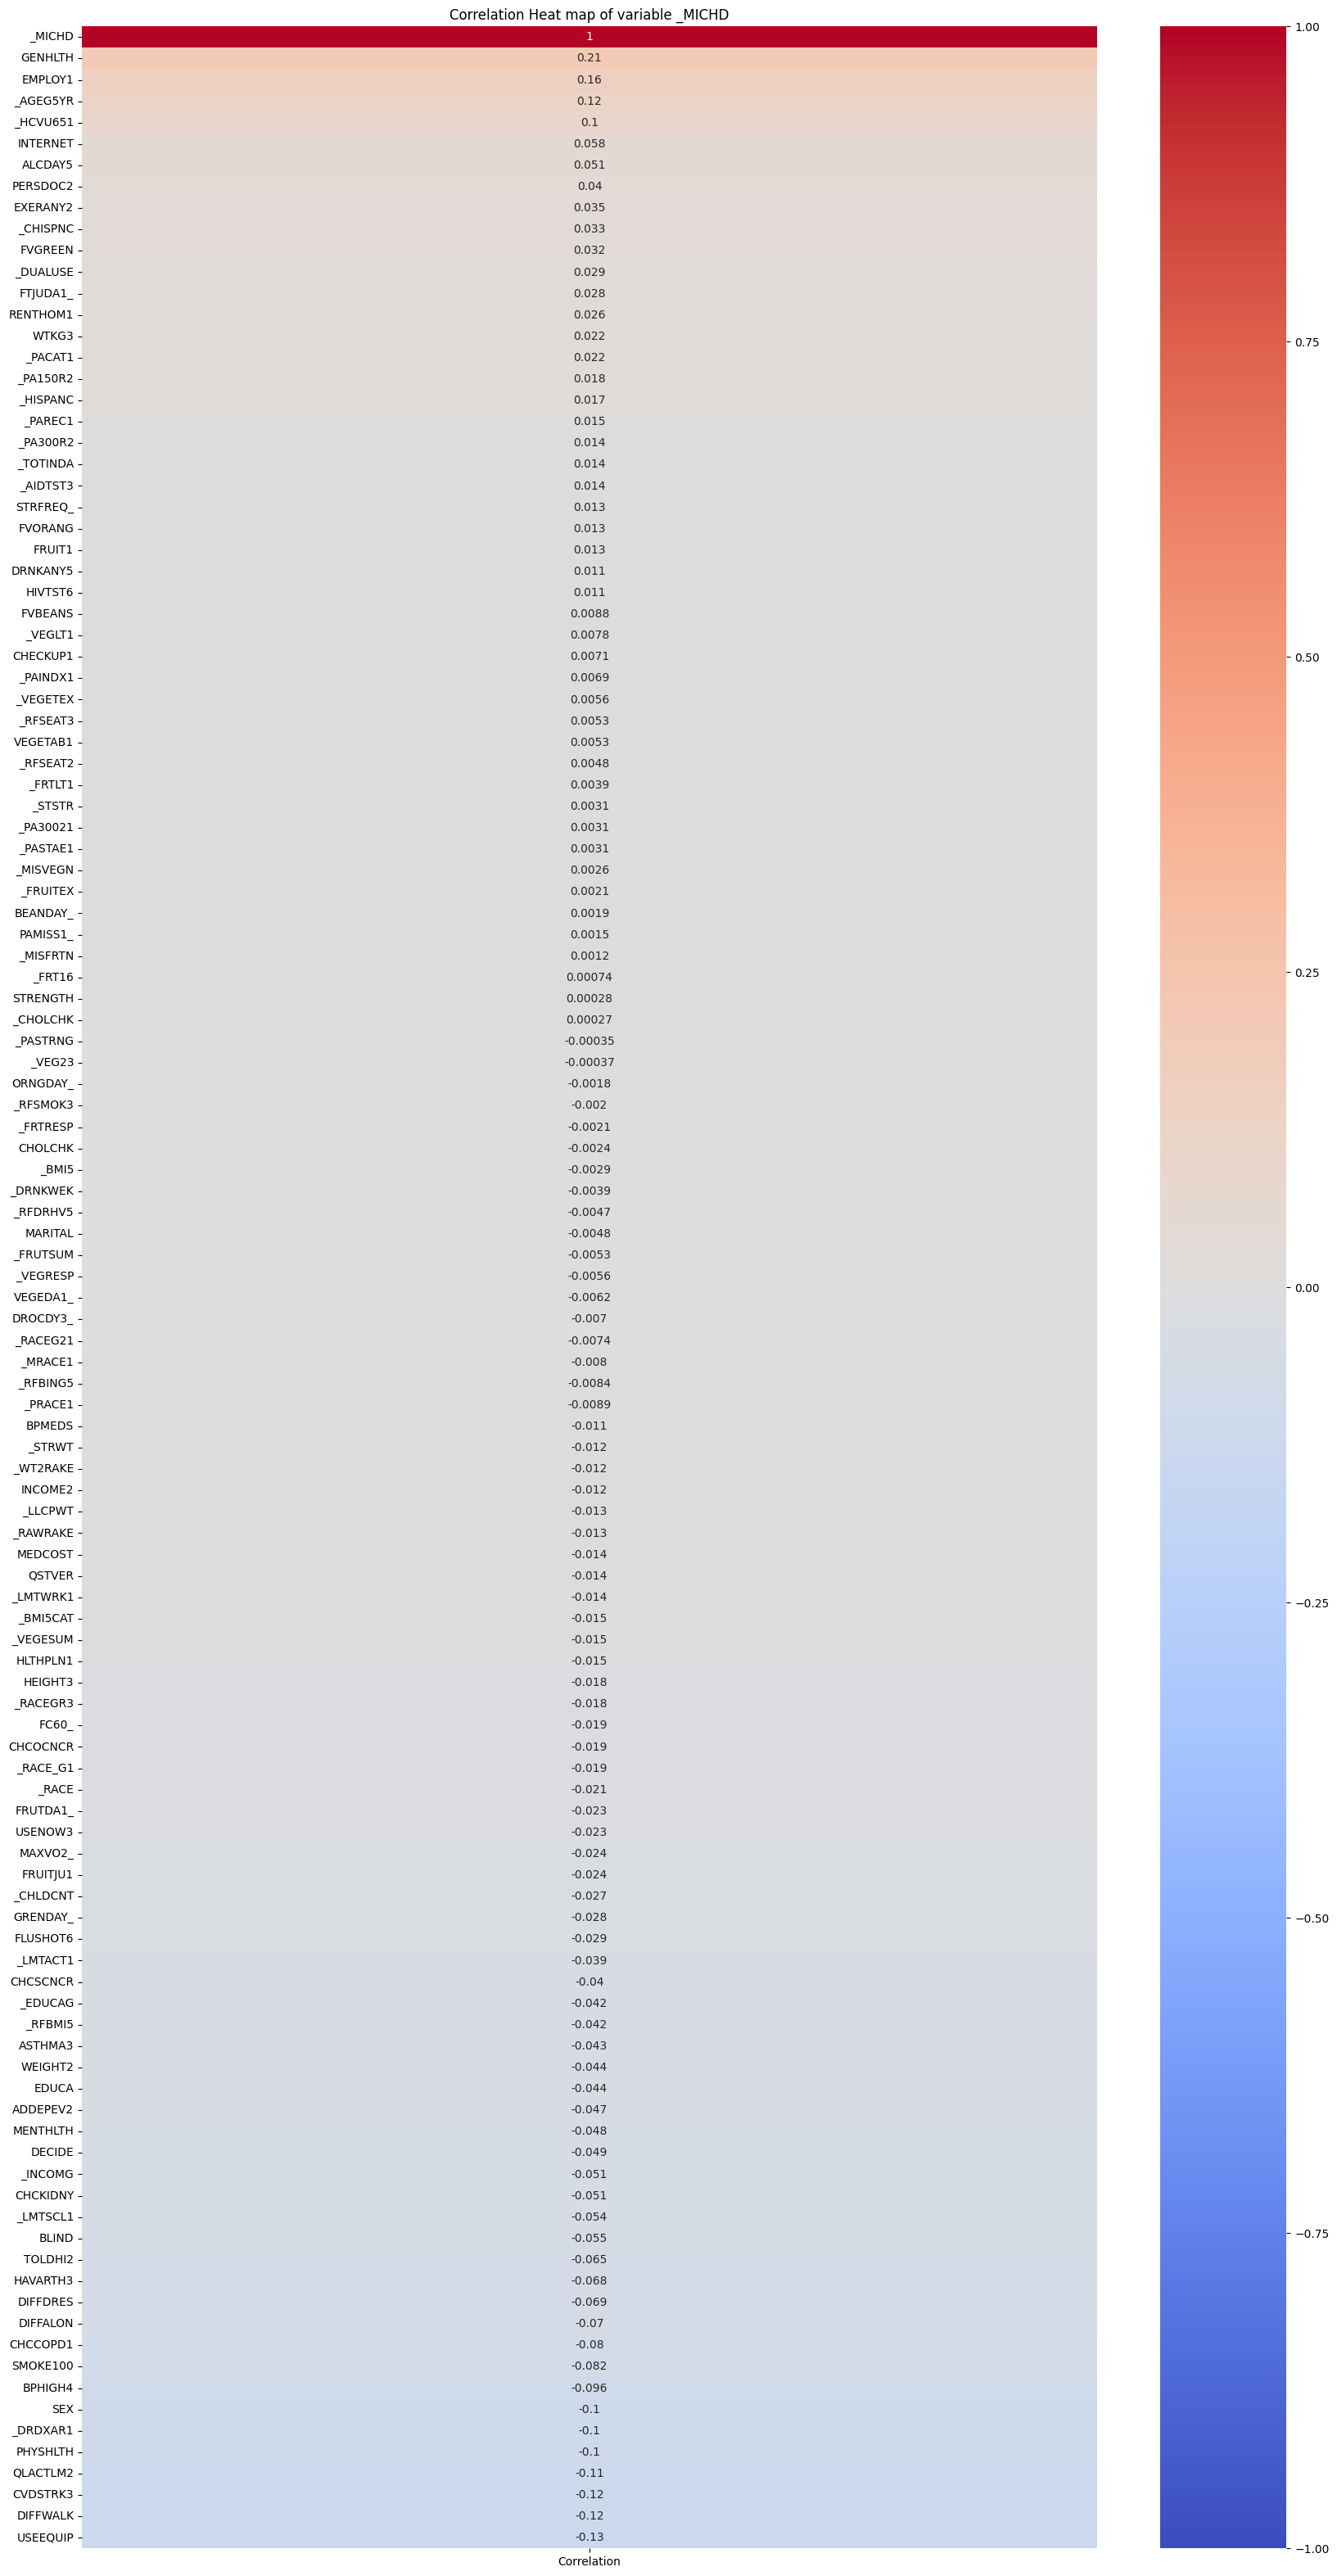

In [35]:
# Calculate the correlations of the variable of interest with all other variables
correlations = data_cleaned2.corrwith(data_cleaned2['_MICHD']).sort_values(ascending=False)

# Create a DataFrame with the correlations.
df_correlations = pd.DataFrame(correlations, columns=['Correlation'])

# Plot the heat map
plt.figure(figsize=(20, 40))
sns.heatmap(df_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heat map of variable _MICHD')
plt.show()

**Most correlated variables with target variable**

In [36]:
significant_correlations = df_correlations[df_correlations['Correlation'].abs() > 0.05]
selected_features_correlations = list(significant_correlations.index)

print(significant_correlations)
print("")
print(f'Final Selected features (long {len(selected_features_correlations)}):')
print(selected_features_correlations)

          Correlation
_MICHD       1.000000
GENHLTH      0.206838
EMPLOY1      0.156157
_AGEG5YR     0.120275
_HCVU651     0.100215
INTERNET     0.057898
ALCDAY5      0.050780
_INCOMG     -0.050897
CHCKIDNY    -0.051173
_LMTSCL1    -0.054492
BLIND       -0.055151
TOLDHI2     -0.064619
HAVARTH3    -0.068424
DIFFDRES    -0.069010
DIFFALON    -0.069701
CHCCOPD1    -0.080398
SMOKE100    -0.082129
BPHIGH4     -0.095517
SEX         -0.102062
_DRDXAR1    -0.102065
PHYSHLTH    -0.103723
QLACTLM2    -0.114722
CVDSTRK3    -0.120174
DIFFWALK    -0.123518
USEEQUIP    -0.132644

Final Selected features (long 25):
['_MICHD', 'GENHLTH', 'EMPLOY1', '_AGEG5YR', '_HCVU651', 'INTERNET', 'ALCDAY5', '_INCOMG', 'CHCKIDNY', '_LMTSCL1', 'BLIND', 'TOLDHI2', 'HAVARTH3', 'DIFFDRES', 'DIFFALON', 'CHCCOPD1', 'SMOKE100', 'BPHIGH4', 'SEX', '_DRDXAR1', 'PHYSHLTH', 'QLACTLM2', 'CVDSTRK3', 'DIFFWALK', 'USEEQUIP']


**Boxplots and violin plots**

In [37]:
# categoric with numeric
def plots(feature):
    # Violin Plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='_MICHD', y=feature, data=data_cleaned2, palette=["green", "red"])
    plt.title(f'Violin plot of {feature} per _MICHD')
    plt.show()

**Very correlated feature**

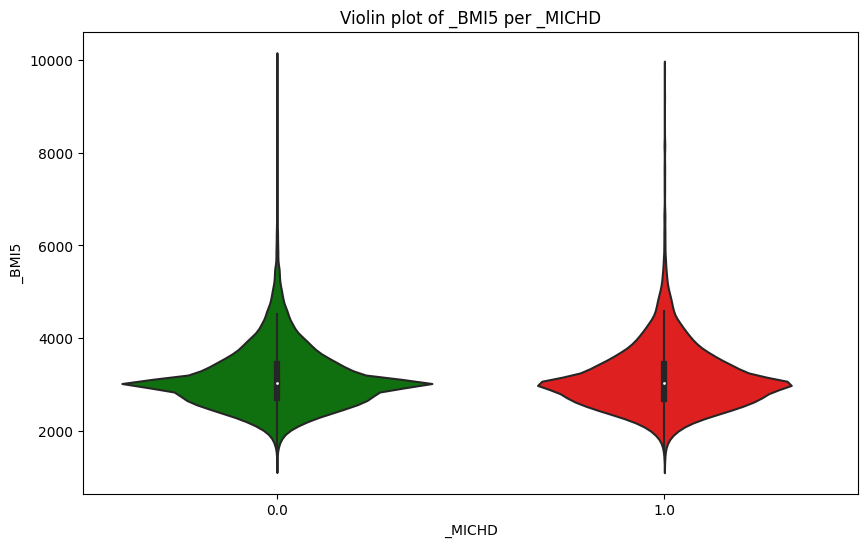

In [38]:
plots('_BMI5')

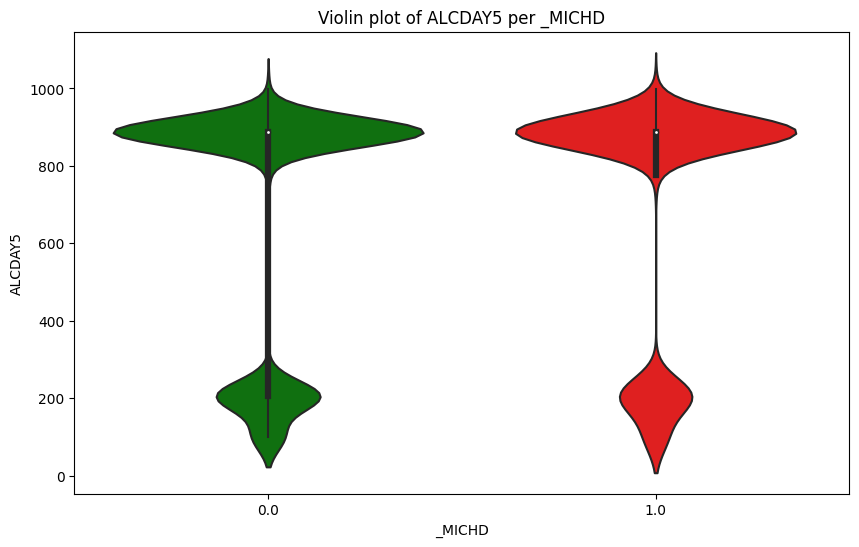

In [39]:
plots('ALCDAY5')

**Poorly correlated feature**

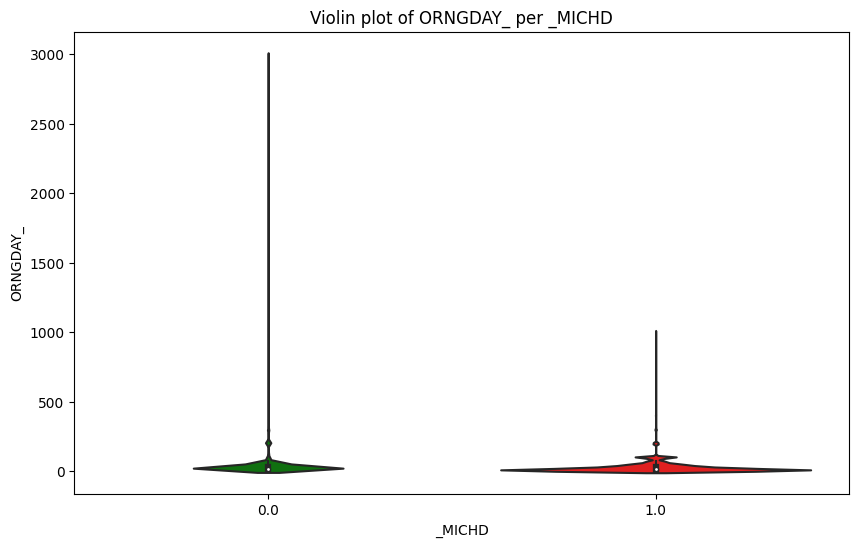

In [40]:
plots('ORNGDAY_')

------

## **FEATURE SELECTION for the modelos**

**Stepwise backward elimination method**

In [41]:
target_variable = '_MICHD'

# Define a significance level to keep the variable.
# For example, we can use a p-value of 0.05.
SL = 0.000001

# We assume that `df` is the DataFrame containing all selected variables and the target variable.
variables = data_cleaned2.columns.tolist()
variables.remove(target_variable)

# We start with all the variables
selected_features_backward = variables.copy()

# Loop to eliminate variables
while len(selected_features_backward) > 0:
    # Adjust the model
    X_train = data_cleaned2[selected_features_backward]
    X_train = sm.add_constant(X_train)  # Add the constant
    y_train = data_cleaned2[target_variable]
    model = sm.Logit(y_train, X_train).fit(disp=0)  # Adjust the model without printing output
    
    # Obtain the largest p-value of the variables in the model.
    max_p_value = model.pvalues.drop('const').max() # Ignore the constant
    
    if max_p_value > SL:
        # If the maximum p-value is greater than the significance level,
        # eliminate the corresponding variable.
        excluded_variable = model.pvalues.drop('const').idxmax()
        selected_features_backward.remove(excluded_variable)
    else:
        # If all variables have a p-value below the threshold, terminate the loop.
        break

print(f'\nSelected features by Stepwise Backward Elimination Method (long {len(selected_features_backward)}):')
print(selected_features_backward)


Selected features by Stepwise Backward Elimination Method (long 19):
['GENHLTH', 'PHYSHLTH', 'PERSDOC2', 'BPHIGH4', 'TOLDHI2', 'CVDSTRK3', 'CHCCOPD1', 'CHCKIDNY', 'SEX', 'EMPLOY1', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', 'SMOKE100', '_DRDXAR1', 'DRNKANY5', 'DROCDY3_', 'MAXVO2_', 'FC60_']


**LASSO**

In [42]:
# Assuming that df_balanced is your DataFrame and '_MICHD' is your target variable
X = data_cleaned2.drop('_MICHD', axis=1).values
y = data_cleaned2['_MICHD'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define the pipeline with Lasso as a model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

# Define the range of alpha values for the grid search
alphas = np.arange(0.01, 1, 0.01)

# Perform grid search to find the best alpha value
search = GridSearchCV(pipeline,
                      {'model__alpha': alphas},
                      cv=5, scoring="neg_mean_squared_error", verbose=0
                      )

# Adjust the model
search.fit(X_train, y_train)

# Obtain the coefficients of the best model found
coefficients = search.best_estimator_.named_steps['model'].coef_

# Calculate the importance of each characteristic based on the coefficients.
importance = np.abs(coefficients)

# Obtain the selected characteristics (those with coefficients different from zero).
selected_features_lasso = data_cleaned2.drop('_MICHD', axis=1).columns[importance > 0]
selected_features_lasso = list(selected_features_lasso)

# Print selected and unselected characteristics
print(f'Selected features by LASSO (long {len(selected_features_lasso)}):')
print(selected_features_lasso)

Selected features by LASSO (long 19):
['GENHLTH', 'PHYSHLTH', 'BPHIGH4', 'TOLDHI2', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD1', 'ADDEPEV2', 'CHCKIDNY', 'SEX', 'EMPLOY1', 'QLACTLM2', 'USEEQUIP', 'DIFFWALK', 'SMOKE100', 'ALCDAY5', '_DRDXAR1', '_AGEG5YR', 'MAXVO2_']


**RFE**

In [43]:
# Separate the characteristics and the target variable
X = data_cleaned2.drop('_MICHD', axis=1)
y = data_cleaned2['_MICHD']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Create RFE object and select a number of characteristics
selector = RFE(estimator=dt, n_features_to_select=25, step=1)

# Adjust RFE
selector = selector.fit(X_train, y_train)

# View selected features
selected_features_rfe = X_train.columns[selector.support_]
selected_features_rfe = list(selected_features_rfe)

# Print selected and unselected characteristics
print(f'Selected features by RFE (long {len(selected_features_rfe)}):')
print(selected_features_rfe)

Selected features by RFE (long 25):
['GENHLTH', 'PHYSHLTH', 'CVDSTRK3', 'INCOME2', 'WEIGHT2', 'HEIGHT3', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', '_STSTR', '_STRWT', '_WT2RAKE', '_LLCPWT', 'WTKG3', '_BMI5', 'FRUTDA1_', 'BEANDAY_', 'GRENDAY_', 'ORNGDAY_', '_FRUTSUM', '_VEGESUM', 'MAXVO2_', 'FC60_']


**Frequency of variable in Feature Selection methods**

In [44]:
# Combine lists
all_features =  selected_features_correlations + selected_features_rfe + selected_features_lasso + selected_features_correlations

# Count the times of each feature in all lists
count = {}
for feature in all_features:
    if feature in count:
        count[feature] += 1
    else:
        count[feature] = 1

# Create the DataFrame from the dictionary
features_freq = pd.DataFrame(list(count.items()), columns=['Feature', 'Frequency'])

# Sort the DataFrame by frequency in descending order
features_freq.sort_values('Frequency', ascending=False, inplace=True)
features_freq

,Feature,Frequency
22,CVDSTRK3,4
1,GENHLTH,4
20,PHYSHLTH,4
24,USEEQUIP,3
15,CHCCOPD1,3
18,SEX,3
19,_DRDXAR1,3
11,TOLDHI2,3
21,QLACTLM2,3
8,CHCKIDNY,3


##### **Select Final Features**

In [45]:
# Filter to obtain only the elements with a frequency greater than or equal to 3.
df_filtered = features_freq[features_freq['Frequency'] >= 3]

# Sort the filtered DataFrame by frequency in descending order
df_filtered = df_filtered.sort_values('Frequency', ascending=False)

# Convert the filtered strings to a list
final_features = df_filtered['Feature'].tolist()

print(df_filtered)
print("")
print(f'Final Selected features (long {len(final_features)}):')
print(final_features)

     Feature  Frequency
22  CVDSTRK3          4
1    GENHLTH          4
20  PHYSHLTH          4
24  USEEQUIP          3
15  CHCCOPD1          3
18       SEX          3
19  _DRDXAR1          3
11   TOLDHI2          3
21  QLACTLM2          3
8   CHCKIDNY          3
17   BPHIGH4          3
23  DIFFWALK          3
6    ALCDAY5          3
3   _AGEG5YR          3
2    EMPLOY1          3
16  SMOKE100          3

Final Selected features (long 16):
['CVDSTRK3', 'GENHLTH', 'PHYSHLTH', 'USEEQUIP', 'CHCCOPD1', 'SEX', '_DRDXAR1', 'TOLDHI2', 'QLACTLM2', 'CHCKIDNY', 'BPHIGH4', 'DIFFWALK', 'ALCDAY5', '_AGEG5YR', 'EMPLOY1', 'SMOKE100']


**Export final dataset**

In [46]:
final_features.append('MENTHLTH')
final_features.append('_TOTINDA')

In [47]:
final_features.append('_MICHD')
final_df = data_cleaned2[final_features]
final_df

,CVDSTRK3,GENHLTH,PHYSHLTH,USEEQUIP,CHCCOPD1,SEX,_DRDXAR1,TOLDHI2,QLACTLM2,CHCKIDNY,BPHIGH4,DIFFWALK,ALCDAY5,_AGEG5YR,EMPLOY1,SMOKE100,MENTHLTH,_TOTINDA,_MICHD
11,1.0,5.0,88.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,888.0,13.0,8.0,2.0,88.0,2.0,1.0
12,1.0,5.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,888.0,11.0,7.0,1.0,88.0,9.0,0.0
16,2.0,5.0,30.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,888.0,9.0,8.0,1.0,30.0,2.0,1.0
21,2.0,3.0,88.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,201.0,13.0,7.0,1.0,88.0,1.0,0.0
24,1.0,5.0,99.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,888.0,9.0,9.0,1.0,99.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441433,2.0,5.0,88.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,888.0,9.0,7.0,2.0,30.0,2.0,0.0
441436,2.0,5.0,88.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,888.0,13.0,7.0,2.0,15.0,2.0,1.0
441439,2.0,3.0,88.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,888.0,11.0,5.0,2.0,88.0,2.0,0.0
441451,2.0,4.0,88.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,888.0,11.0,7.0,2.0,88.0,2.0,0.0


In [48]:
#'CVDSTRK3'
final_df['CVDSTRK3'] = final_df['CVDSTRK3'].replace({2:0})
final_df = final_df[final_df.CVDSTRK3 != 7]
final_df = final_df[final_df.CVDSTRK3 != 9]


#'PHYSHLTH'
final_df['PHYSHLTH'] = final_df['PHYSHLTH'].replace({88:0})
final_df = final_df[final_df.PHYSHLTH != 77]
final_df = final_df[final_df.PHYSHLTH != 99]


#'GENHLTH'
final_df = final_df[final_df.GENHLTH != 7]
final_df = final_df[final_df.GENHLTH != 9]


#'BPHIGH4'
final_df['BPHIGH4'] = final_df['BPHIGH4'].replace({3:0})
final_df = final_df[final_df.BPHIGH4 != 2]
final_df = final_df[final_df.BPHIGH4 != 4]
final_df = final_df[final_df.BPHIGH4 != 7]
final_df = final_df[final_df.BPHIGH4 != 9]


#'_DRDXAR1'
final_df['_DRDXAR1'] = final_df['_DRDXAR1'].replace({2:0})


#'TOLDHI2'
final_df['TOLDHI2'] = final_df['TOLDHI2'].replace({2:0})
final_df = final_df[final_df.TOLDHI2 != 7]
final_df = final_df[final_df.TOLDHI2 != 9]


#'SEX'
final_df['SEX'] = final_df['SEX'].replace({2:0})


#'QLACTLM2'
final_df['QLACTLM2'] = final_df['QLACTLM2'].replace({2:0})
final_df = final_df[final_df.QLACTLM2 != 7]
final_df = final_df[final_df.QLACTLM2 != 9]


#'USEEQUIP'
final_df['USEEQUIP'] = final_df['USEEQUIP'].replace({2:0})
final_df = final_df[final_df.USEEQUIP != 7]
final_df = final_df[final_df.USEEQUIP != 9]


#'SMOKE100'
final_df['SMOKE100'] = final_df['SMOKE100'].replace({2:0})
final_df = final_df[final_df.SMOKE100 != 7]
final_df = final_df[final_df.SMOKE100 != 9]


#'DIFFWALK'
final_df['DIFFWALK'] = final_df['DIFFWALK'].replace({2:0})
final_df = final_df[final_df.DIFFWALK != 7]
final_df = final_df[final_df.DIFFWALK != 9]


#'_AGEG5YR'
final_df = final_df[final_df._AGEG5YR != 14]


#'EMPLOY1'
final_df = final_df[final_df.EMPLOY1 != 9]


#'CHCCOPD1'
final_df['CHCCOPD1'] = final_df['CHCCOPD1'].replace({2:0})
final_df = final_df[final_df.CHCCOPD1 != 7]
final_df = final_df[final_df.CHCCOPD1 != 9]


#'MENTHLTH'
final_df['MENTHLTH'] = final_df['MENTHLTH'].replace({88:0})
final_df = final_df[final_df.MENTHLTH != 77]
final_df = final_df[final_df.MENTHLTH != 99]


#'_TOTINDA'
final_df['_TOTINDA'] = final_df['_TOTINDA'].replace({2:0})
final_df = final_df[final_df._TOTINDA != 9]

In [49]:
#'CHCKIDNY'
final_df['CHCKIDNY'] = final_df['CHCKIDNY'].replace({2:0})
final_df = final_df[final_df.CHCKIDNY != 7]
final_df = final_df[final_df.CHCKIDNY != 9]

#'ALCDAY5'
final_df['ALCDAY5'] = final_df['ALCDAY5'].replace({888:0})
final_df = final_df[final_df.ALCDAY5 != 777]
final_df = final_df[final_df.ALCDAY5 != 999]

In [50]:
final_df

,CVDSTRK3,GENHLTH,PHYSHLTH,USEEQUIP,CHCCOPD1,SEX,_DRDXAR1,TOLDHI2,QLACTLM2,CHCKIDNY,BPHIGH4,DIFFWALK,ALCDAY5,_AGEG5YR,EMPLOY1,SMOKE100,MENTHLTH,_TOTINDA,_MICHD
11,1.0,5.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,13.0,8.0,0.0,0.0,0.0,1.0
16,0.0,5.0,30.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,9.0,8.0,1.0,30.0,0.0,1.0
21,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,201.0,13.0,7.0,1.0,0.0,1.0,0.0
33,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,201.0,11.0,7.0,0.0,0.0,0.0,0.0
37,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,215.0,7.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441433,0.0,5.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,9.0,7.0,0.0,30.0,0.0,0.0
441436,0.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,13.0,7.0,0.0,15.0,0.0,1.0
441439,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,11.0,5.0,0.0,0.0,0.0,0.0
441451,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,11.0,7.0,0.0,0.0,0.0,0.0


## **DATA BALANCING**

**Variable CHD distribution before balancing**

In [51]:
final_df.groupby(['_MICHD']).size()

_MICHD
0.0    33170
1.0     9801
dtype: int64

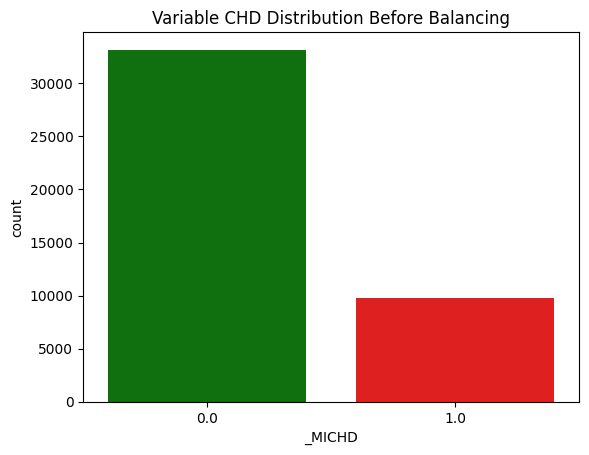

In [52]:
sns.countplot(x='_MICHD', data=final_df, palette=["green", "red"])
plt.title('Variable CHD Distribution Before Balancing')
plt.show()

### **Balancing with DOWN SAMPLING**

In [53]:
# Separate the DataFrame in two based on the classes
df_majority = final_df[final_df._MICHD == 0]
df_minority = final_df[final_df._MICHD == 1]

# Downsampling of the majority class
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)  # Equal the number of samples to the minority class.

# Combining the minority class with the downsampled majority class
df_balanced_ds = pd.concat([df_majority_downsampled, df_minority])

# Shuffle rows so that they are not grouped by class
df_balanced_ds = df_balanced_ds.sample(frac=1, random_state=42).reset_index(drop=True)

**Variable CHD distribution after balancing**

In [54]:
df_balanced_ds.groupby(['_MICHD']).size()

_MICHD
0.0    9801
1.0    9801
dtype: int64

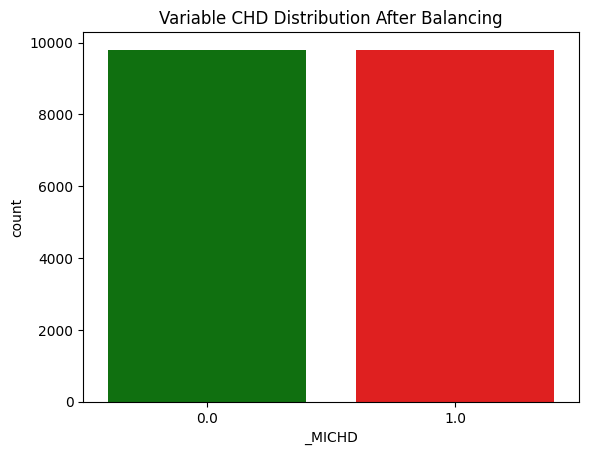

In [55]:
sns.countplot(x='_MICHD', data=df_balanced_ds, palette=["green", "red"])
plt.title('Variable CHD Distribution After Balancing')
plt.show()

### **Balancing with UP SAMPLING**

In [56]:
# Separate the DataFrame in two based on the classes
df_majority = final_df[final_df._MICHD == 0]
df_minority = final_df[final_df._MICHD == 1]

# Up sampling of the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sampling with replacement
                                 n_samples=len(df_majority),     # Equal the number of samples to that of the majority class
                                 random_state=42)  # For reproducibility

# Combining the majority class with the minority class upsampled
df_balanced_us = pd.concat([df_majority, df_minority_upsampled])

# Shuffle rows so that they are not grouped by class
df_balanced_us = df_balanced_us.sample(frac=1, random_state=42).reset_index(drop=True)

**Variable CHD distribution after balancing**

In [57]:
df_balanced_us.groupby(['_MICHD']).size()

_MICHD
0.0    33170
1.0    33170
dtype: int64

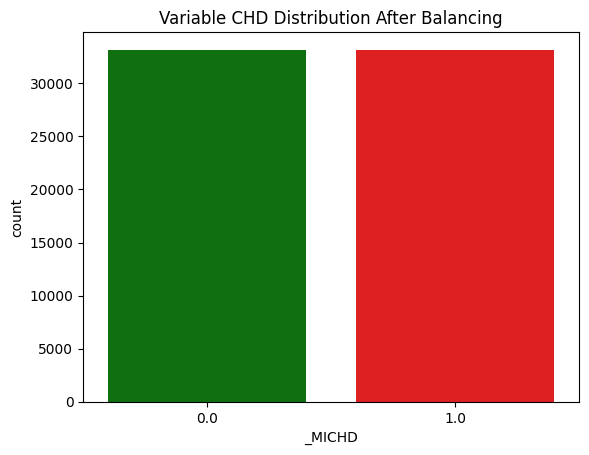

In [58]:
sns.countplot(x='_MICHD', data=df_balanced_us, palette=["green", "red"])
plt.title('Variable CHD Distribution After Balancing')
plt.show()

### **Balancing with SMOTE**

In [59]:
from imblearn.over_sampling import SMOTENC

# Identify the indexes of categorical characteristics
categorical_features_indices = [i for i, col in enumerate(final_df.drop('_MICHD', axis=1).columns)
                                if pd.api.types.is_categorical_dtype(final_df[col])]

# Configure SMOTENC with the indexes of the categorical features
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)

# Separate characteristics and label
X = final_df.drop('_MICHD', axis=1)  
y = final_df['_MICHD']

# Apply SMOTENC
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Create a new DataFrame with the data resampled
df_balanced_smote = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced_smote['_MICHD'] = y_resampled

**Variable CHD distribution after balancing**

In [60]:
df_balanced_smote.groupby(['_MICHD']).size()

_MICHD
0.0    33170
1.0    33170
dtype: int64

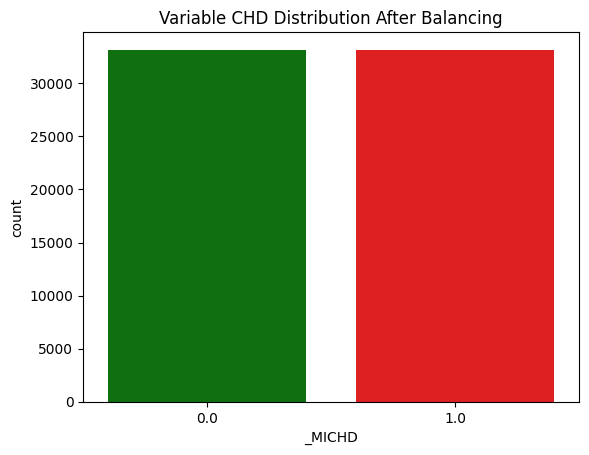

In [61]:
sns.countplot(x='_MICHD', data=df_balanced_smote, palette=["green", "red"])
plt.title('Variable CHD Distribution After Balancing')
plt.show()

### **Compare balance techniques**

In [62]:
# Function to prepare the data, train the model and evaluate the model
def train_and_evaluate(df):
    X = df.drop(columns=['_MICHD'])  
    y = df['_MICHD']  # The target column

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #8

    # Create and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall/Sensitivity: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")

results = {}
dataframes = [df_balanced_ds, df_balanced_us, df_balanced_smote]  
balancing_techniques = ['DOWN SAMPLING', 'UP SAMPLING', 'SMOTE']  

# Iterate over each DataFrame and apply the function
for df, name in zip(dataframes, balancing_techniques):
    print(name)
    train_and_evaluate(df)

DOWN SAMPLING
Accuracy: 0.67
Precision: 0.69
Recall/Sensitivity: 0.64
F1 Score: 0.66


UP SAMPLING
Accuracy: 0.68
Precision: 0.69
Recall/Sensitivity: 0.64
F1 Score: 0.66


SMOTE
Accuracy: 0.69
Precision: 0.69
Recall/Sensitivity: 0.68
F1 Score: 0.68




In [63]:
# Export final dataset to CSV
df_balanced_smote.to_csv("final_dataset.csv", index=False)

In [64]:
dtype_dict = df_balanced_smote.dtypes.apply(lambda x: x.name).to_dict()
dtype_dict

{'CVDSTRK3': 'category',
 'GENHLTH': 'category',
 'PHYSHLTH': 'float64',
 'USEEQUIP': 'category',
 'CHCCOPD1': 'category',
 'SEX': 'category',
 '_DRDXAR1': 'category',
 'TOLDHI2': 'category',
 'QLACTLM2': 'category',
 'CHCKIDNY': 'category',
 'BPHIGH4': 'category',
 'DIFFWALK': 'category',
 'ALCDAY5': 'float64',
 '_AGEG5YR': 'category',
 'EMPLOY1': 'category',
 'SMOKE100': 'category',
 'MENTHLTH': 'float64',
 '_TOTINDA': 'category',
 '_MICHD': 'category'}

----

## **EXPLORATORY DATA ANALYSIS (after feature selection)**

**Read final dataset**

In [65]:
final_dataset = pd.read_csv('final_dataset.csv', dtype=dtype_dict)

**Correlation map**

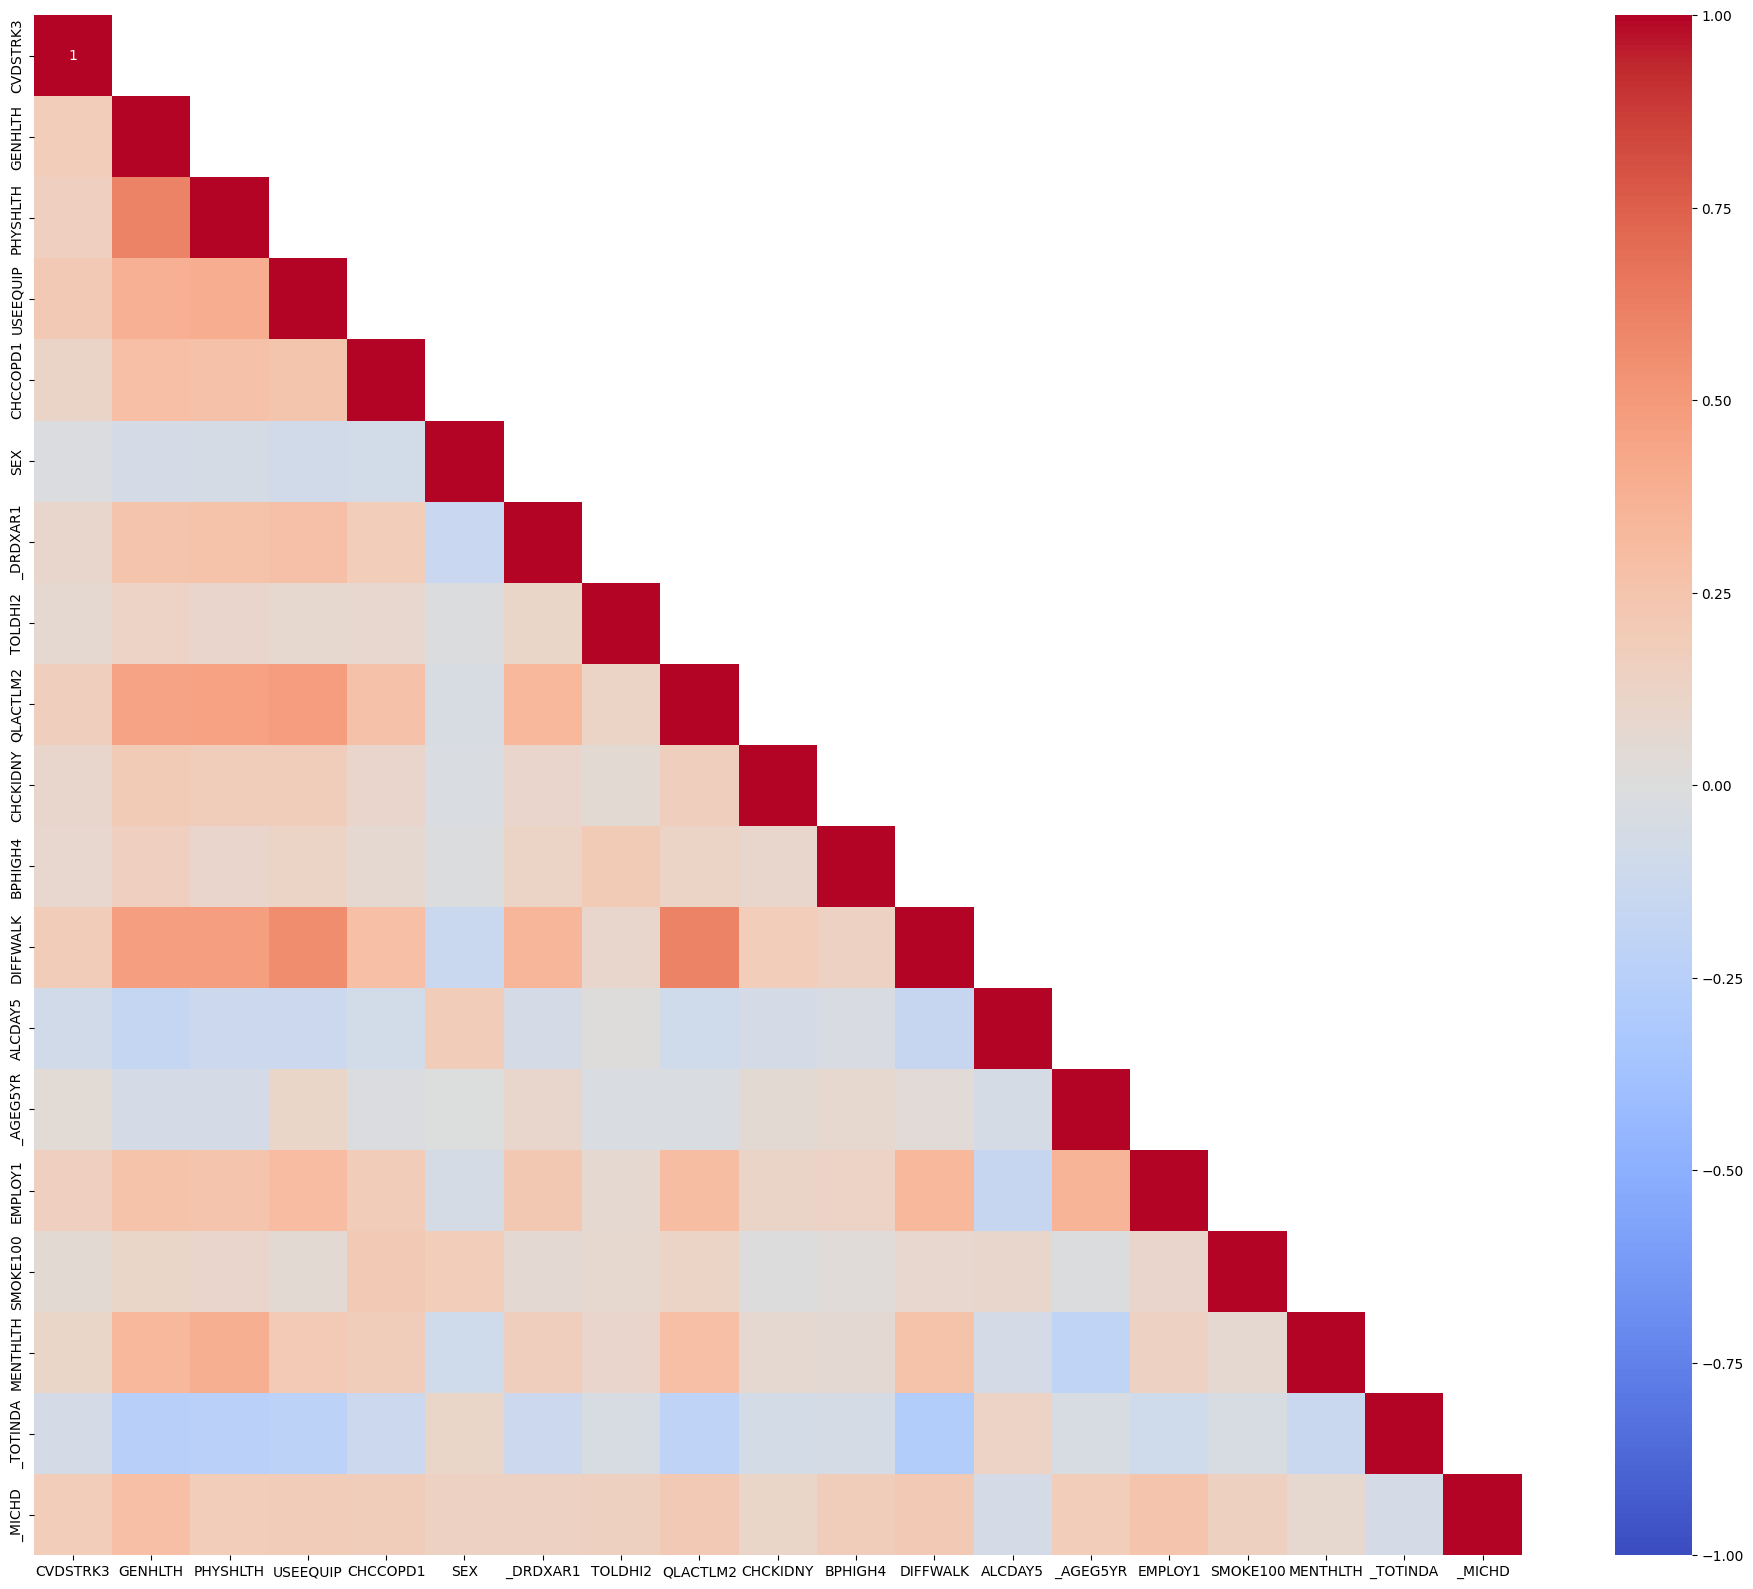

In [66]:
# Calculate the correlation matrix of the dataframe (correlation coefficients between variables)
matriz_correlacion = final_dataset.corr()

# Create a mask to hide the upper triangular part excluding the diagonal
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool), k=1)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(24, 20))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.show()

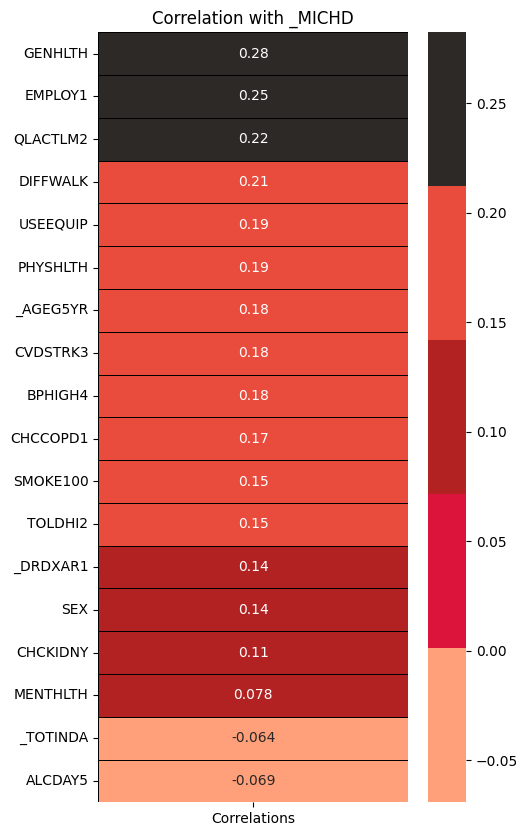

In [67]:
# Calculate correlation with '_MICHD'.
corr = final_dataset.drop('_MICHD', axis=1).corrwith(final_dataset['_MICHD']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Define custom colors as a scale
colors = ["#FFA07A", "#DC143C", "#B22222", "#E94B3C", "#2D2926"]  # Colores en formato HEX

# Create the heatmap
plt.subplots(figsize=(5,10))
sns.heatmap(corr, annot=True, cmap=sns.color_palette(colors, as_cmap=True), linewidths=0.4, linecolor='black')
plt.title('Correlation with _MICHD')
plt.show()

**Univariate analysis of features and target variable**

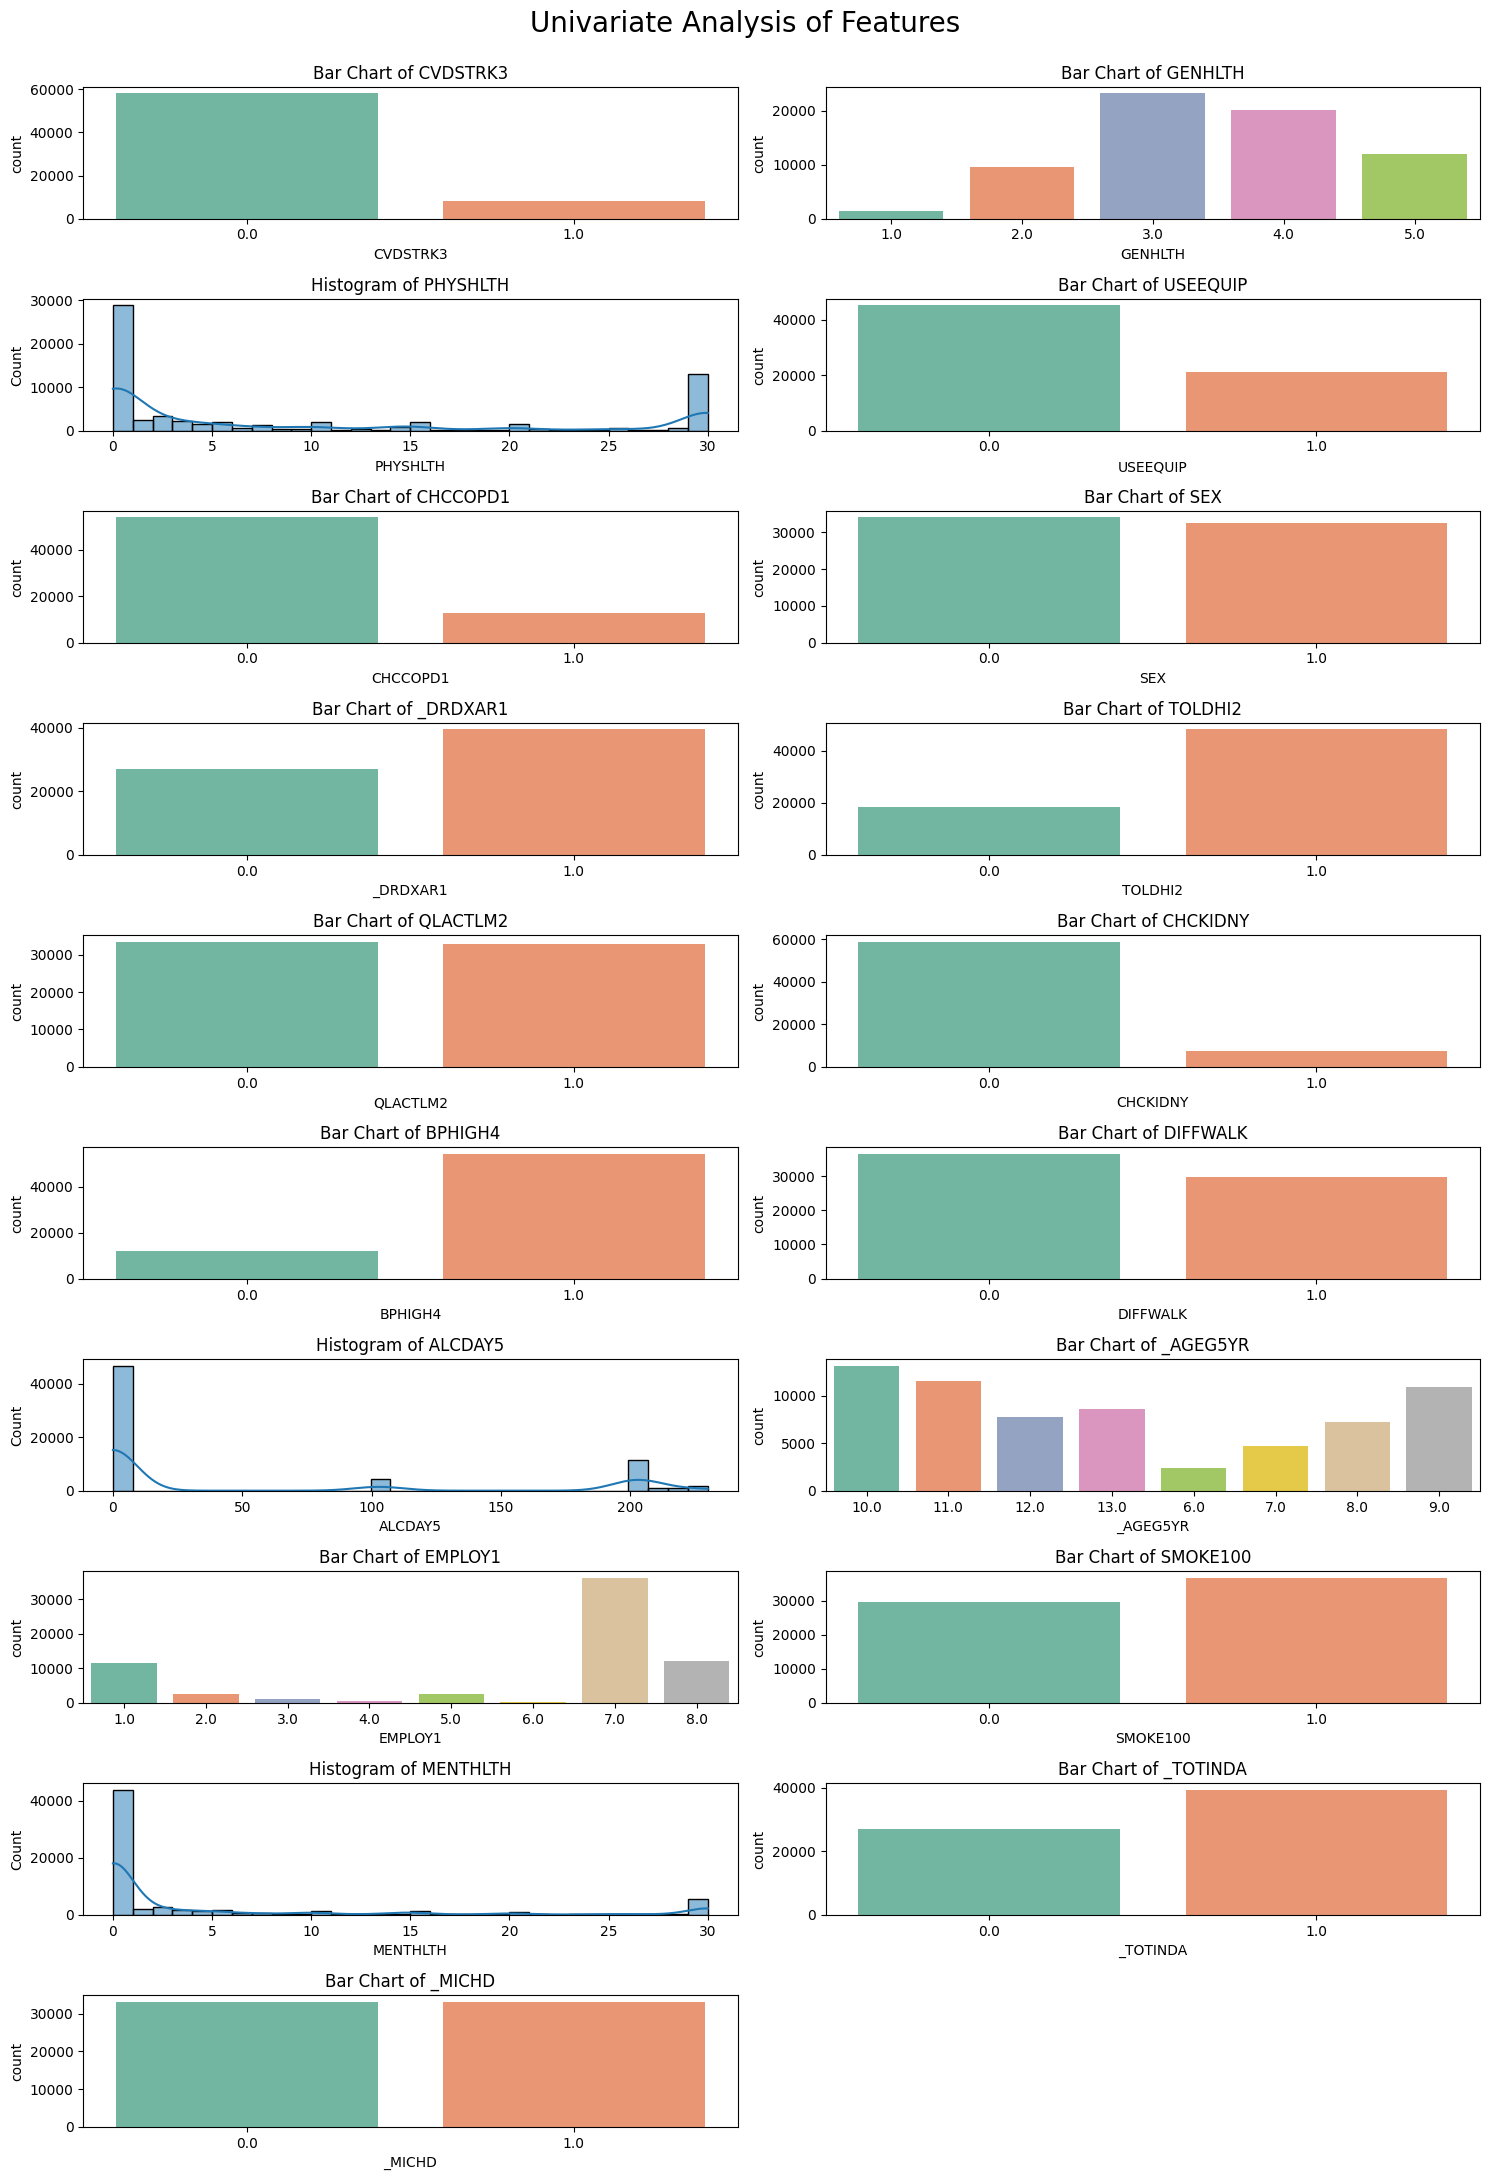

In [68]:
# Create a figure to contain the subcharts
plt.figure(figsize=(15, 40))

# Go through all the characteristics and create a graphic for each one.
for i, column in enumerate(final_features):
    plt.subplot(len(final_features), 2, i + 1)
    # Verify whether the column is numeric or categorical
    if pd.api.types.is_numeric_dtype(final_dataset[column]):
        # If numerical, draw a histogram
        sns.histplot(data=final_dataset, x=column, kde=True, bins=30)
        plt.title(f"Histogram of {column}")
    else:
        # If categorical, draw a bar chart.
        sns.countplot(data=final_dataset, x=column, palette="Set2")
        plt.title(f"Bar Chart of {column}")
    plt.tight_layout()

# Add a general title to the figure
plt.suptitle("Univariate Analysis of Features", fontsize=20, x=0.5, y=1.01)

# Show the figure
plt.show()

**Bivariate analysis of features with target variable**

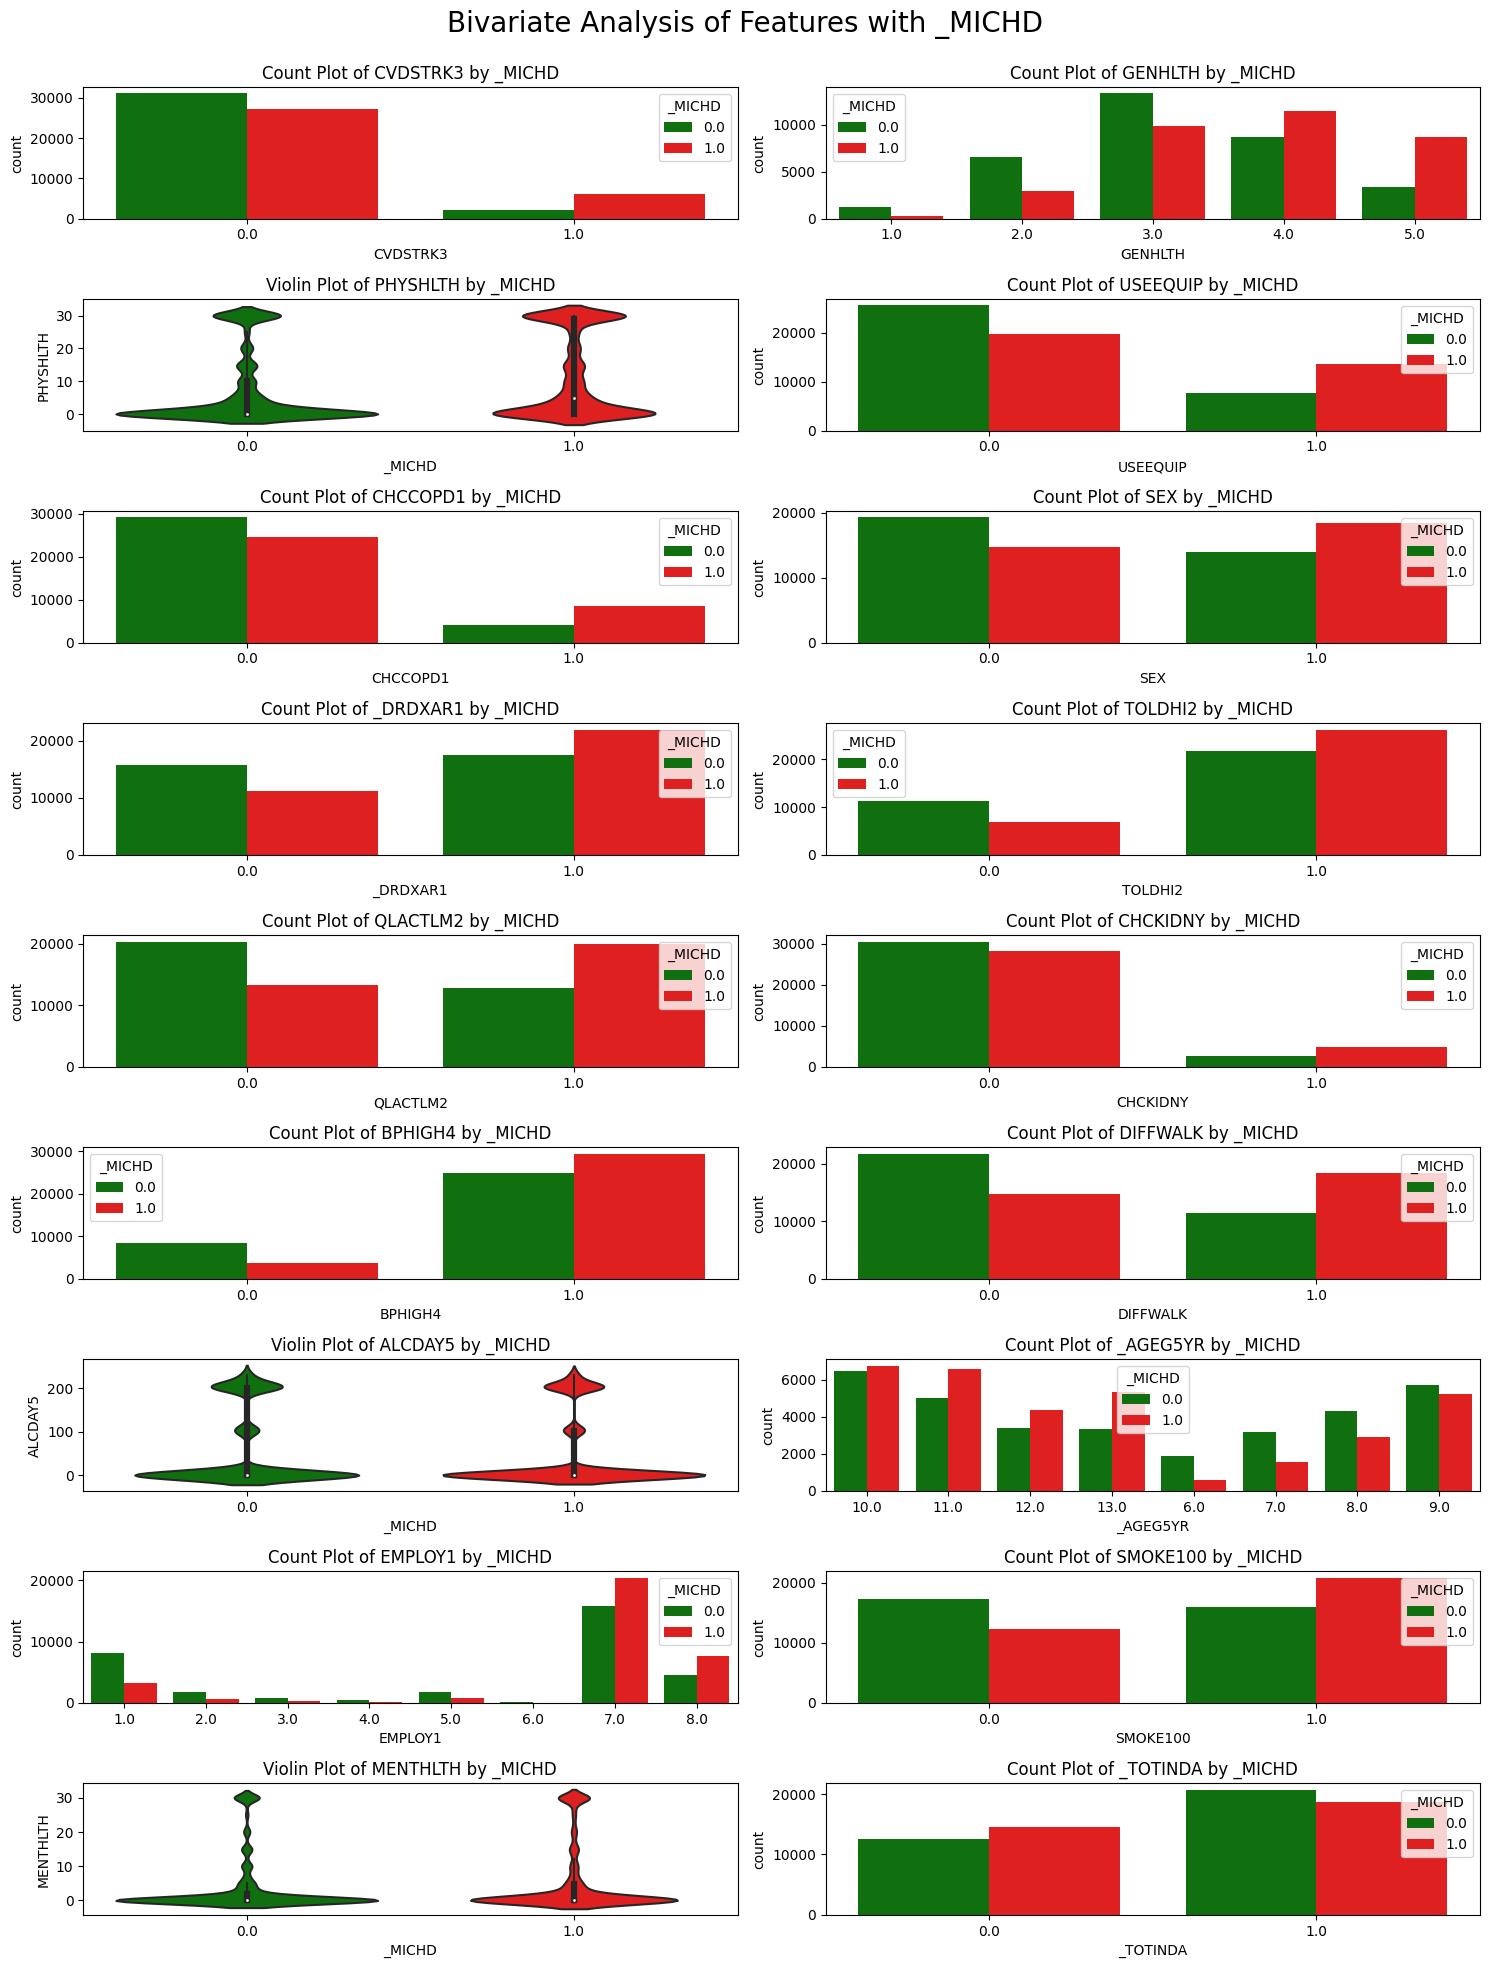

In [69]:
# Create a figure to contain the subcharts
plt.figure(figsize=(15, 40))

# Go through all the characteristics and create a graphic for each one.
for i, column in enumerate(final_features[0:18]):
    plt.subplot(len(final_features), 2, i + 1)
    
    if pd.api.types.is_numeric_dtype(final_dataset[column]):
        # Violin diagram for numerical variables
        sns.violinplot(x='_MICHD', y=column, data=final_dataset, split=True, palette=['green', 'red'])
        plt.title(f"Violin Plot of {column} by _MICHD")
    else:
        # Countplot for categorical variables, grouped by the target variable '_MICHD'.
        sns.countplot(x=column, hue='_MICHD', data=final_dataset, palette=['green', 'red'])
        plt.title(f"Count Plot of {column} by _MICHD")
        plt.legend(title='_MICHD')
    
    plt.tight_layout()

# Add a general title to the figure
plt.suptitle("Bivariate Analysis of Features with _MICHD", fontsize=20, x=0.5, y=1.01)

# Show the figure
plt.show()

----

## **IMPLEMENTATION OF MODELS**

**Train test split**

In [70]:
target_variable = '_MICHD'  # target variable
X = df_balanced_smote.drop(columns=[target_variable])  # Characteristics without the target variable
y = df_balanced_smote[target_variable]  # target variable

# Split the data into training and test sets again.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Divide into categorical and numeric features**

In [71]:
# Automatically identify categorical and numeric columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

**Models**

In [72]:
# create a list of models to evaluate

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)), # dibujar un arbol con sus parametros
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),   
]

# Create the preprocessor that will apply OneHotEncoder to the categorical variables
# and will pass the numeric ones unchanged or apply some scaling if deemed necessary.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_features),
        ('num', StandardScaler(), numeric_features)  # Switch the StandardScaler() to 'passthrough' if prefer nothing
    ])

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # make prediction on the test data
    y_pred = pipeline.predict(X_test)
    
    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # print the performance metrics
    print("Model:", name.upper())
    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall/Sensitivity: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name
        best_pipeline = pipeline

# Retrieve and print the best model and its parameters
if best_model:
    print("Best Model: ", best_model)
    print("Parameters of the Best Model:")
    print(best_pipeline['model'].get_params())

Model: LOGISTIC REGRESSION
Accuracy: 0.70
Precision: 0.70
Recall/Sensitivity: 0.71
F1 Score: 0.70


Model: GRADIENT BOOSTING
Accuracy: 0.74
Precision: 0.74
Recall/Sensitivity: 0.75
F1 Score: 0.74


Model: DECISION TREE CLASSIFIER
Accuracy: 0.75
Precision: 0.74
Recall/Sensitivity: 0.78
F1 Score: 0.76


Model: ADABOOST CLASSIFIER
Accuracy: 0.71
Precision: 0.71
Recall/Sensitivity: 0.72
F1 Score: 0.71


Model: RANDOM FOREST
Accuracy: 0.81
Precision: 0.80
Recall/Sensitivity: 0.83
F1 Score: 0.82


Model: XGBOOST CLASSIFIER
Accuracy: 0.79
Precision: 0.82
Recall/Sensitivity: 0.75
F1 Score: 0.78


Best Model:  Random Forest
Parameters of the Best Model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_sco

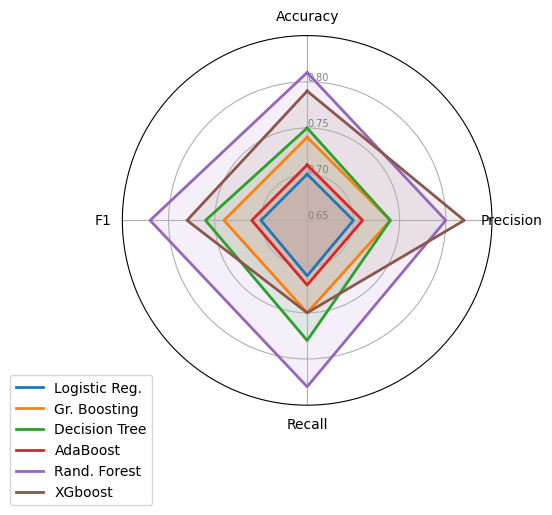

In [73]:
# Create a dataframe with our data
data = {
    'Model': ['Logistic Reg.', 'Gr. Boosting', 'Decision Tree', 'AdaBoost', 'Rand. Forest', 'XGboost'],
    'Accuracy': [0.70, 0.74, 0.75, 0.71, 0.81, 0.79],
    'Precision': [0.70, 0.74, 0.74, 0.71, 0.80, 0.82],
    'Recall': [0.71, 0.75, 0.78, 0.72, 0.83, 0.75],
    'F1': [0.70, 0.74, 0.76, 0.71, 0.82, 0.78]
}

df_spider = pd.DataFrame(data)

# Number of variables
categories = list(df_spider)[1:]
N = len(categories)

# Angles for categories
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Inicialize spider graph
ax = plt.subplot(111, polar=True)

# Firs axis up
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# One tag for every axis
plt.xticks(angles[:-1], categories)

# Draw an axi for every incremental value of 0.05
ax.set_rlabel_position(0)
plt.yticks([0.65, 0.70, 0.75, 0.80], ["0.65","0.70","0.75","0.80"], color="grey", size=7)
plt.ylim(0.65,0.85)

# Draw every model on the graphic
for i in range(len(df_spider)):
    values = df_spider.loc[i].drop('Model').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_spider.loc[i]['Model'])
    ax.fill(angles, values, alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**ROC curve of models**

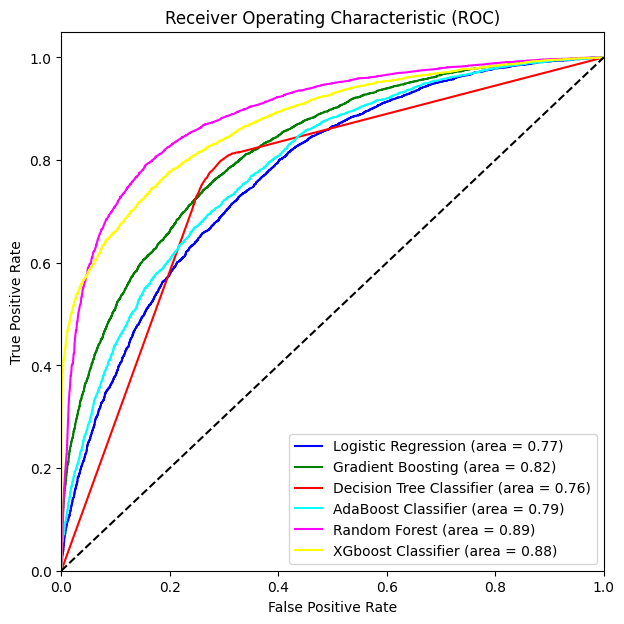

In [74]:
# Define colours for ROC curves of every model
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple']

# Prepare matplotlib figure
plt.figure(figsize=(7, 7))

# Loop through the models to calculate and plot the ROC curve.
for (name, model), color in zip(models, colors):
    # Create and train the pipeline for the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    
    # Probability predictions for the test set
    y_prob = pipeline.predict_proba(X_test)[:, 1]  
    
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC curve
    plt.plot(fpr, tpr, color=color, label=f'{name} (area = {roc_auc:.2f})')

# Draw the reference line
plt.plot([0, 1], [0, 1], 'k--')

# Set chart limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Hyperparameter tunning**

In [75]:
# Define the parameters for the GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 3, 4],  
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score obtained
print("\nBest parameters: ", grid_search.best_params_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Best parameters:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.82


----

## **MODELS' EVALUATION**

**Metrics**

In [76]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.81
Recall/Sensitivity: 0.83
F1 Score: 0.82


**ROC curve**

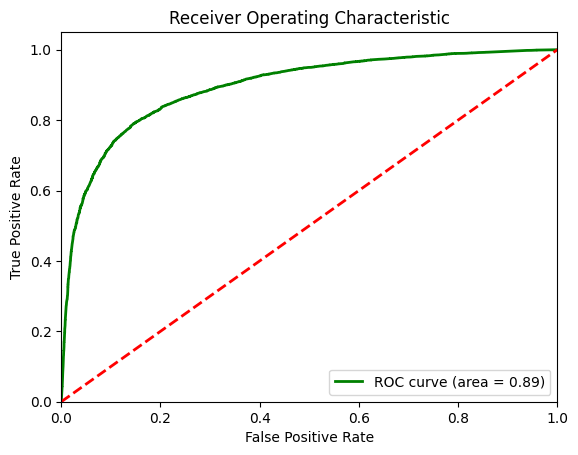

In [77]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Confusion matrix**

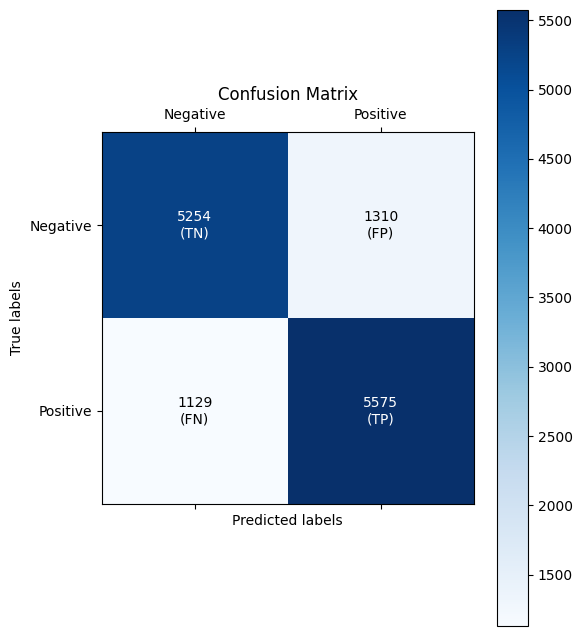

In [78]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 8))
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
fig.colorbar(cax)

# Setting labels for axes
ax.set_xticklabels([''] + ["Negative", "Positive"])
ax.set_yticklabels([''] + ["Negative", "Positive"])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Annotate each cell with the numeric value and outcome label
labels = ['TN', 'FP', 'FN', 'TP']
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        label = labels[i * 2 + j]
        ax.text(j, i, f"{cm[i, j]}\n({label})", ha='center', va='center',
                color="white" if cm[i, j] > thresh else "black")

plt.show()

**Specificity**

In [79]:
# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.80


----

## **FEATURE IMPORTANCE**

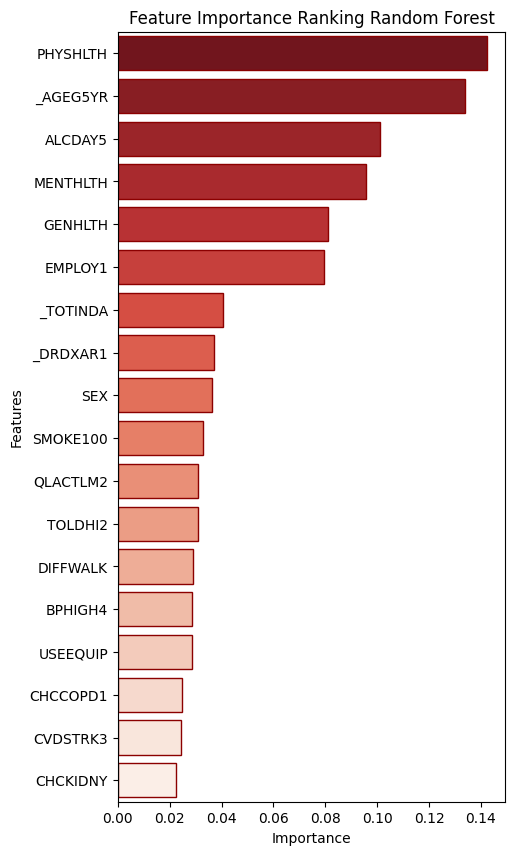

In [80]:
# Extract features names
feature_names = X_train.columns

# Get feature importances from the model
importances = best_model.feature_importances_

# Create a DataFrame to hold the feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame based on the importance of the features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(5, 10))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='Reds_r', edgecolor='darkred', ax=plt.gca())
plt.title('Feature Importance Ranking Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

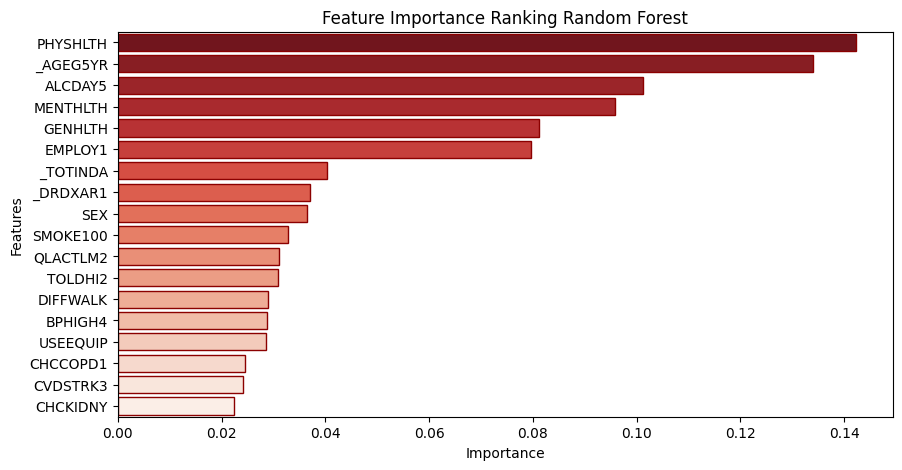

In [81]:
# Extract features names
feature_names = X_train.columns

# Get feature importances from the model
importances = best_model.feature_importances_

# Create a DataFrame to hold the feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame based on the importance of the features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='Reds_r', edgecolor='darkred', ax=plt.gca())
plt.title('Feature Importance Ranking Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()